## Kütüphaneleri Yükleme

In [1]:
import warnings
import random
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from scipy.stats import friedmanchisquare
from scipy.stats import wilcoxon

In [2]:
warnings.filterwarnings("ignore")

## Veriye İlk Bakış

In [3]:
df = pd.read_csv("C:/Users/musta/Desktop/addis_ababa/RTA Dataset.csv")
pd.set_option('display.max_columns', None)

df.head(100)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,17:35:00,Thursday,18-30,Male,Junior high school,Employee,2-5yr,Lorry (41?100Q),Owner,2-5yrs,No defect,Residential areas,Double carriageway (median),Tangent road with flat terrain,Y Shape,Other,Dry,Daylight,Normal,Vehicle with vehicle collision,3,1,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving carelessly,Slight Injury
96,17:35:00,Thursday,18-30,Male,Junior high school,Employee,2-5yr,Public (13?45 seats),Owner,NaN,No defect,Office areas,Two-way (divided with broken lines road marking),Tangent road with mild grade and flat terrain,Y Shape,Gravel roads,Dry,Daylight,Normal,Vehicle with vehicle collision,3,1,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
97,17:35:00,Thursday,31-50,Male,Junior high school,Employee,2-5yr,Long lorry,Owner,5-10yrs,No defect,Office areas,Two-way (divided with broken lines road marking),Tangent road with mild grade and flat terrain,Y Shape,Gravel roads,Dry,Daylight,Normal,Vehicle with vehicle collision,3,1,Going straight,Driver or rider,Female,18-30,3,NaN,Normal,Not a Pedestrian,Changing lane to the left,Slight Injury
98,20:50:00,Sunday,18-30,Unknown,Junior high school,Employee,2-5yr,Automobile,Owner,2-5yrs,NaN,Residential areas,Two-way (divided with broken lines road marking),Tangent road with flat terrain,No junction,Asphalt roads,Dry,Darkness - lights lit,Normal,Collision with pedestrians,2,1,Going straight,Driver or rider,Male,31-50,2,NaN,NaN,Not a Pedestrian,Driving carelessly,Slight Injury


In [4]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [5]:
df_turkce = df.rename(columns={
    'Time': 'Zaman',
    'Day_of_week': 'Haftanın_Günü',
    'Age_band_of_driver': 'Sürücünün_Yaş_Aralığı',
    'Sex_of_driver': 'Sürücünün_Cinsiyeti',
    'Educational_level': 'Eğitim_Düzeyi',
    'Vehicle_driver_relation': 'Araç_Sürücü_İlişkisi',
    'Driving_experience': 'Sürüş_Deneyimi',
    'Type_of_vehicle': 'Araç_Tipi',
    'Owner_of_vehicle': 'Araç_Sahibi',
    'Service_year_of_vehicle': 'Aracın_Hizmet_Yılı',
    'Defect_of_vehicle': 'Araç_Arızası',
    'Area_accident_occured': 'Kaza_Meydana_Geldiği_Alan',
    'Lanes_or_Medians': 'Şeritler_Veya_Refüjler',
    'Road_allignment': 'Yol_Şekli',
    'Types_of_Junction': 'Kavşak_Tipi',
    'Road_surface_type': 'Yol_Yüzey_Tipi',
    'Road_surface_conditions': 'Yol_Yüzey_Durumu',
    'Light_conditions': 'Işık_Koşulları',
    'Weather_conditions': 'Hava_Koşulları',
    'Type_of_collision': 'Çarpışma_Tipi',
    'Number_of_vehicles_involved': 'Kaza_Yapan_Araç_Sayısı',
    'Number_of_casualties': 'Yaralı_Sayısı',
    'Vehicle_movement': 'Araç_Hareketi',
    'Casualty_class': 'Yaralanma_Sınıfı',
    'Sex_of_casualty': 'Yaralının_Cinsiyeti',
    'Age_band_of_casualty': 'Yaralının_Yaş_Aralığı',
    'Casualty_severity': 'Yaralanma_Ciddiyeti',
    'Work_of_casuality': 'Yaralının_Mesleği',
    'Fitness_of_casuality': 'Yaralının_Sağlık_Durumu',
    'Pedestrian_movement': 'Yayaların_Hareketi',
    'Cause_of_accident': 'Kazanın_Nedeni',
    'Accident_severity': 'Kaza_Ciddiyeti'
})
df_turkce

,Zaman,Haftanın_Günü,Sürücünün_Yaş_Aralığı,Sürücünün_Cinsiyeti,Eğitim_Düzeyi,Araç_Sürücü_İlişkisi,Sürüş_Deneyimi,Araç_Tipi,Araç_Sahibi,Aracın_Hizmet_Yılı,Araç_Arızası,Kaza_Meydana_Geldiği_Alan,Şeritler_Veya_Refüjler,Yol_Şekli,Kavşak_Tipi,Yol_Yüzey_Tipi,Yol_Yüzey_Durumu,Işık_Koşulları,Hava_Koşulları,Çarpışma_Tipi,Kaza_Yapan_Araç_Sayısı,Yaralı_Sayısı,Araç_Hareketi,Yaralanma_Sınıfı,Yaralının_Cinsiyeti,Yaralının_Yaş_Aralığı,Yaralanma_Ciddiyeti,Yaralının_Mesleği,Yaralının_Sağlık_Durumu,Yayaların_Hareketi,Kazanın_Nedeni,Kaza_Ciddiyeti
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,No defect,Outside rural areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,No defect,Outside rural areas,Two-way (divided with broken lines road marking),Escarpments,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,No defect,Outside rural areas,Two-way (divided with broken lines road marking),Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,1,1,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,No defect,Office areas,Undivided Two way,Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,1,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [6]:
for sütun in df_turkce.columns:
    print(f"🔹 {sütun} sütununun ilk 15 eşsiz değeri:")
    print(df_turkce[sütun].unique()[:15])  # ilk 15 eşsiz değeri yazdır
    print("-" * 40)

🔹 Zaman sütununun ilk 15 eşsiz değeri:
['17:02:00' '1:06:00' '14:15:00' '17:30:00' '17:20:00' '14:40:00'
 '17:45:00' '22:45:00' '8:20:00' '15:10:00' '12:11:00' '18:36:00'
 '14:35:00' '12:25:00' '15:30:00']
----------------------------------------
🔹 Haftanın_Günü sütununun ilk 15 eşsiz değeri:
['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']
----------------------------------------
🔹 Sürücünün_Yaş_Aralığı sütununun ilk 15 eşsiz değeri:
['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown']
----------------------------------------
🔹 Sürücünün_Cinsiyeti sütununun ilk 15 eşsiz değeri:
['Male' 'Female' 'Unknown']
----------------------------------------
🔹 Eğitim_Düzeyi sütununun ilk 15 eşsiz değeri:
['Above high school' 'Junior high school' nan 'Elementary school'
 'High school' 'Unknown' 'Illiterate' 'Writing & reading']
----------------------------------------
🔹 Araç_Sürücü_İlişkisi sütununun ilk 15 eşsiz değeri:
['Employee' 'Unknown' 'Owner' nan 'Other']
---------------

In [7]:
df_turkce.describe().T

,count,mean,std,min,25%,50%,75%,max
Kaza_Yapan_Araç_Sayısı,12316.0,2.040679,0.688790,1.0,2.0,2.0,2.0,7.0
Yaralı_Sayısı,12316.0,1.548149,1.007179,1.0,1.0,1.0,2.0,8.0


## Eksik Veri Analizi

In [8]:
df_turkce.replace(["unknown", "Unknown", "UNKNOWN", "na","nan", "Na", "NA", "NaN", ""], np.nan, inplace=True)
df_turkce = df_turkce.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [9]:
print(df_turkce.isnull().sum())  
print(df_turkce.isnull().mean() * 100)

Zaman                           0
Haftanın_Günü                   0
Sürücünün_Yaş_Aralığı        1548
Sürücünün_Cinsiyeti           178
Eğitim_Düzeyi                 841
Araç_Sürücü_İlişkisi          593
Sürüş_Deneyimi                862
Araç_Tipi                     950
Araç_Sahibi                   482
Aracın_Hizmet_Yılı           6811
Araç_Arızası                 4427
Kaza_Meydana_Geldiği_Alan     261
Şeritler_Veya_Refüjler        442
Yol_Şekli                     142
Kavşak_Tipi                  1078
Yol_Yüzey_Tipi                172
Yol_Yüzey_Durumu                0
Işık_Koşulları                  0
Hava_Koşulları                292
Çarpışma_Tipi                 169
Kaza_Yapan_Araç_Sayısı          0
Yaralı_Sayısı                   0
Araç_Hareketi                 396
Yaralanma_Sınıfı             4443
Yaralının_Cinsiyeti          4443
Yaralının_Yaş_Aralığı        4443
Yaralanma_Ciddiyeti          4443
Yaralının_Mesleği            3217
Yaralının_Sağlık_Durumu      2635
Yayaların_Hare

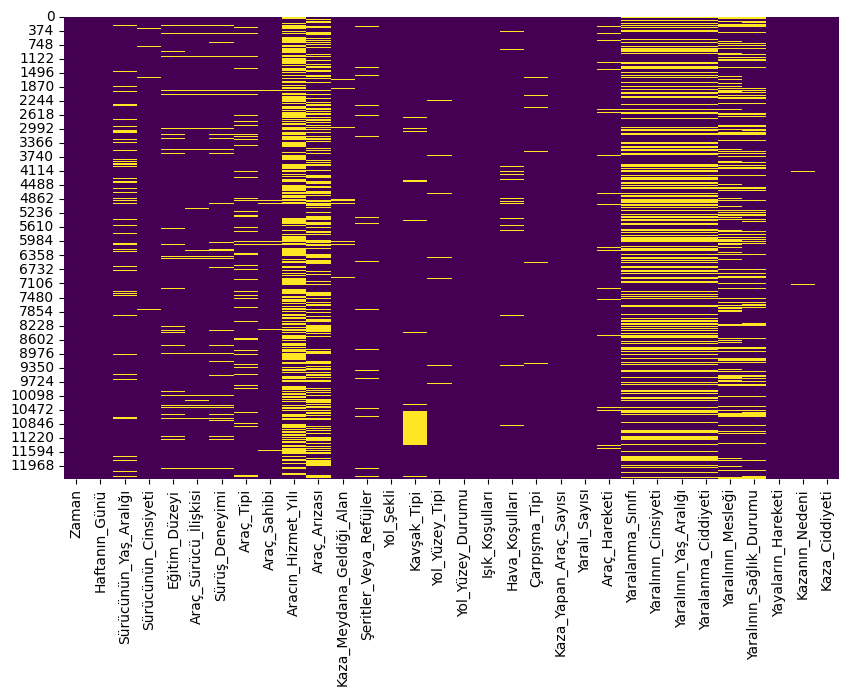

In [10]:
plt.figure(figsize=(10, 6)) 
sns.heatmap(df_turkce.isnull(), cbar=False, cmap='viridis') 
plt.show()

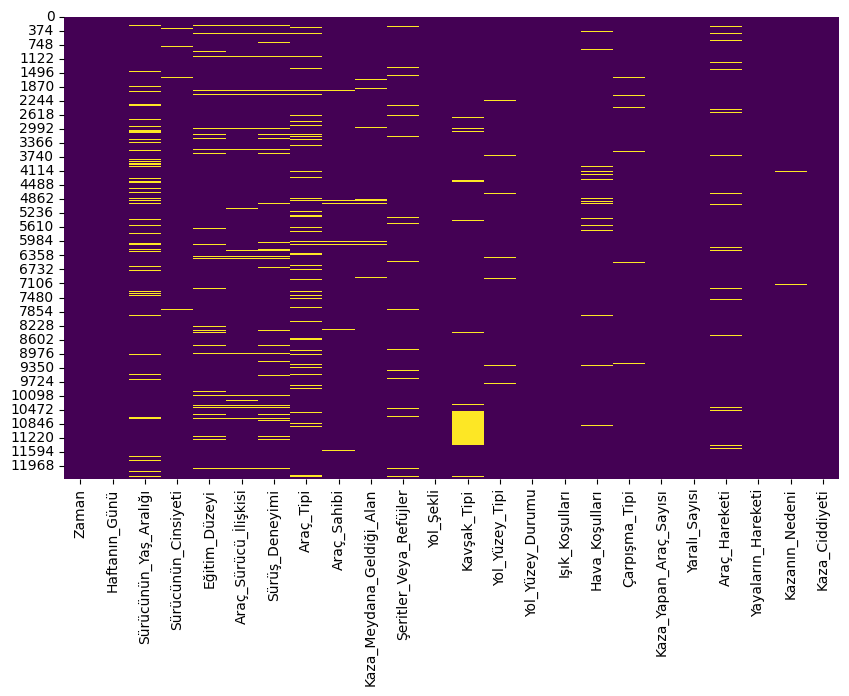

In [11]:
df_turkce.drop(['Aracın_Hizmet_Yılı', 'Araç_Arızası',"Yaralanma_Sınıfı","Yaralının_Cinsiyeti",'Yaralının_Yaş_Aralığı','Yaralanma_Ciddiyeti','Yaralının_Mesleği','Yaralının_Sağlık_Durumu'], axis=1, inplace=True)
plt.figure(figsize=(10, 6)) 
sns.heatmap(df_turkce.isnull(), cbar=False, cmap='viridis') 
plt.show()

In [12]:
def saat_to_float(saat_str):
    if pd.isnull(saat_str):
        return np.nan
    saat, dakika, *_ = map(int, saat_str.split(':'))
    return saat + dakika / 60

def float_to_time_string(saat_float):
    saat = int(saat_float)
    dakika = int((saat_float - saat) * 60)
    return f"{saat:02d}:{dakika:02d}"

df_turkce['Saat_Numeric'] = df_turkce['Zaman'].apply(saat_to_float)

kmeans = KMeans(n_clusters=5, random_state=42)
saat_dizisi = df_turkce[['Saat_Numeric']].dropna().values
df_turkce.loc[df_turkce['Saat_Numeric'].notnull(), 'Saat_Kumesi'] = kmeans.fit_predict(saat_dizisi)

merkezler = kmeans.cluster_centers_.flatten()
merkez_sirali = np.argsort(merkezler)

yeni_kume_map = {orijinal_kume: yeni_kume for yeni_kume, orijinal_kume in enumerate(merkez_sirali)}
df_turkce['Saat_Kumesi'] = df_turkce['Saat_Kumesi'].map(yeni_kume_map)

kume_sinirlari = {}
for kume in sorted(df_turkce['Saat_Kumesi'].dropna().unique()):
    aralik = df_turkce[df_turkce['Saat_Kumesi'] == kume]['Saat_Numeric']
    min_saat = aralik.min()
    max_saat = aralik.max()
    kume_sinirlari[kume] = (float_to_time_string(min_saat), float_to_time_string(max_saat))

df_turkce['Zaman_Kategori'] = df_turkce['Saat_Kumesi'].map(lambda x: f"Kategori_{int(x)}" if pd.notnull(x) else np.nan)

In [13]:
print("🕒 Zaman Kümeleri ve Aralıkları:")
for kume, (start, end) in kume_sinirlari.items():
    print(f"Kategori_{kume}: {start} - {end}")


🕒 Zaman Kümeleri ve Aralıkları:
Kategori_0: 00:01 - 05:19
Kategori_1: 05:24 - 10:50
Kategori_2: 10:50 - 15:05
Kategori_3: 15:05 - 19:03
Kategori_4: 19:04 - 23:59


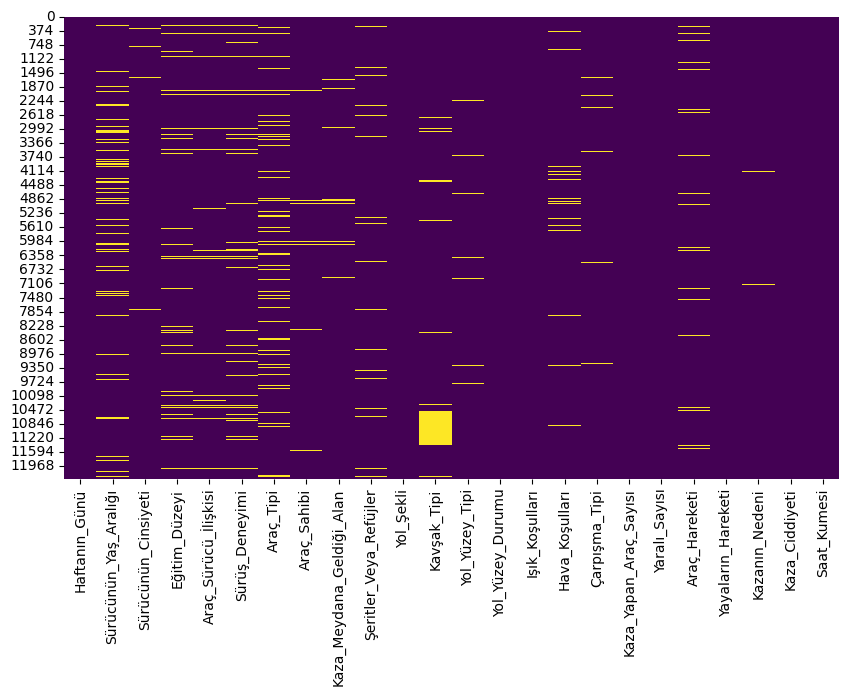

,Haftanın_Günü,Sürücünün_Yaş_Aralığı,Sürücünün_Cinsiyeti,Eğitim_Düzeyi,Araç_Sürücü_İlişkisi,Sürüş_Deneyimi,Araç_Tipi,Araç_Sahibi,Kaza_Meydana_Geldiği_Alan,Şeritler_Veya_Refüjler,Yol_Şekli,Kavşak_Tipi,Yol_Yüzey_Tipi,Yol_Yüzey_Durumu,Işık_Koşulları,Hava_Koşulları,Çarpışma_Tipi,Kaza_Yapan_Araç_Sayısı,Yaralı_Sayısı,Araç_Hareketi,Yayaların_Hareketi,Kazanın_Nedeni,Kaza_Ciddiyeti,Saat_Kumesi
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,Not a Pedestrian,Moving Backward,Slight Injury,3
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury,3
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Not a Pedestrian,Changing lane to the left,Serious Injury,3
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Changing lane to the right,Slight Injury,0
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,Outside rural areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Going straight,Not a Pedestrian,No distancing,Slight Injury,3
12312,Sunday,NaN,Male,Elementary school,Employee,5-10yr,Automobile,Owner,Outside rural areas,Two-way (divided with broken lines road marking),Escarpments,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Other,Not a Pedestrian,No distancing,Slight Injury,3
12313,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,Outside rural areas,Two-way (divided with broken lines road marking),Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,1,1,Other,Not a Pedestrian,Changing lane to the right,Serious Injury,2
12314,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,Office areas,Undivided Two way,Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,1,Other,Not a Pedestrian,Driving under the influence of drugs,Slight Injury,2


In [14]:
df_turkce.drop(['Zaman', 'Saat_Numeric',"Zaman_Kategori"], axis=1, inplace=True)
plt.figure(figsize=(10, 6)) 
sns.heatmap(df_turkce.isnull(), cbar=False, cmap='viridis') 
plt.show()

df_turkce

#### Kalan Eksik Verileri Giderme

In [2]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder

df2 = df_turkce.copy()

kategorik_sutunlar = df2.select_dtypes(include=['object']).columns.tolist()

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
df2_encoded = df2[kategorik_sutunlar].copy()
df2_encoded[:] = encoder.fit_transform(df2_encoded)

imputer = KNNImputer(n_neighbors=3)
df2_imputed = imputer.fit_transform(df2_encoded)

df2_filled = pd.DataFrame(encoder.inverse_transform(df2_imputed), columns=kategorik_sutunlar)

sayisal_sutunlar = df2.select_dtypes(exclude=['object']).columns
df2_final = pd.concat([df2_filled, df2[sayisal_sutunlar].reset_index(drop=True)], axis=1)

NameError: name 'df_turkce' is not defined

In [ ]:
plt.figure(figsize=(10, 6)) 
sns.heatmap(df2_final.isnull(), cbar=False, cmap='viridis') 
plt.show()

## Aykırı Veri Analizi

In [21]:
sayisal_sutunlar = ["Yaralı_Sayısı","Kaza_Yapan_Araç_Sayısı"]
for sutun in sayisal_sutunlar:
    print(f"🔸 {sutun} sütunundaki eşsiz değerler ve frekansları:")
    print(df2_final[sutun].value_counts(dropna=False))
    print("-" * 50)

🔸 Yaralı_Sayısı sütunundaki eşsiz değerler ve frekansları:
Yaralı_Sayısı
1    8397
2    2290
3     909
4     394
5     207
6      89
7      22
8       8
Name: count, dtype: int64
--------------------------------------------------
🔸 Kaza_Yapan_Araç_Sayısı sütunundaki eşsiz değerler ve frekansları:
Kaza_Yapan_Araç_Sayısı
2    8340
1    1996
3    1568
4     363
6      42
7       7
Name: count, dtype: int64
--------------------------------------------------


#### Düzenleme

In [22]:
df2_final["Kaza_Yapan_Araç_Sayısı"] = df2_final["Kaza_Yapan_Araç_Sayısı"].apply(
    lambda x: "2 ve Altı" if x <= 2 else "3 ve Üstü"
)

df2_final["Yaralı_Sayısı"] = df2_final["Yaralı_Sayısı"].apply(
    lambda x: "2 ve Altı" if x <= 2 else "3 ve Üstü"
)

## Veri Görselleştirme

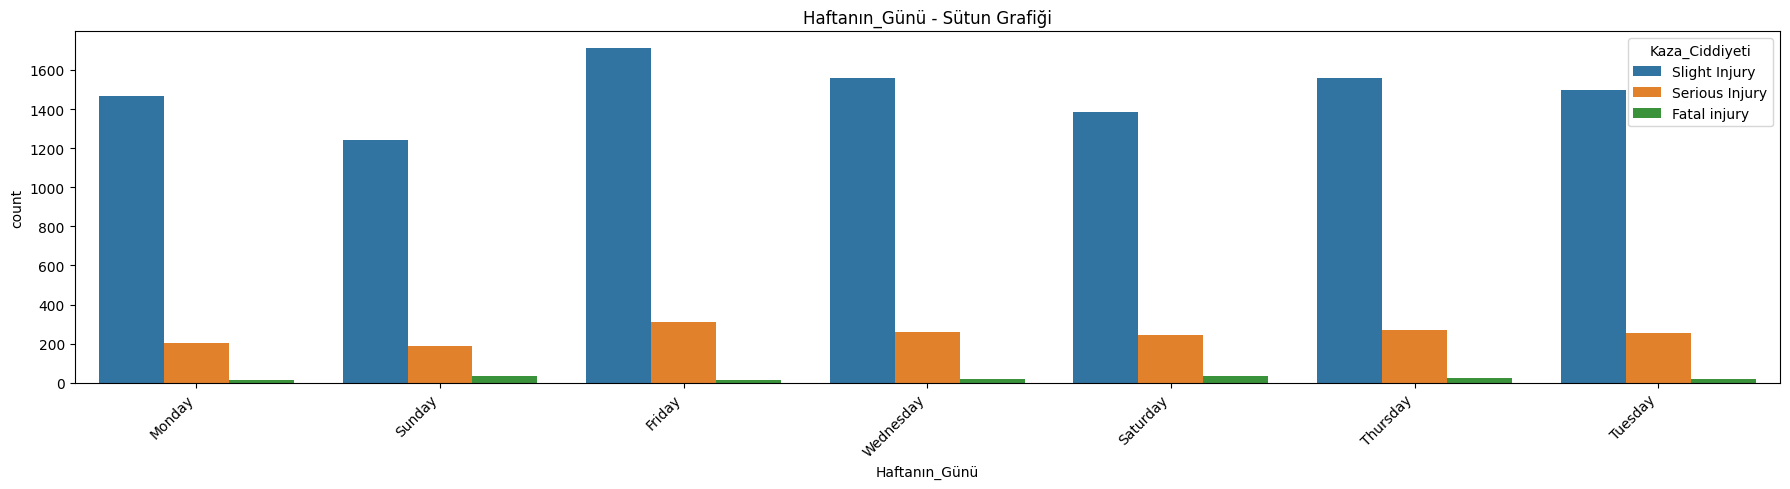

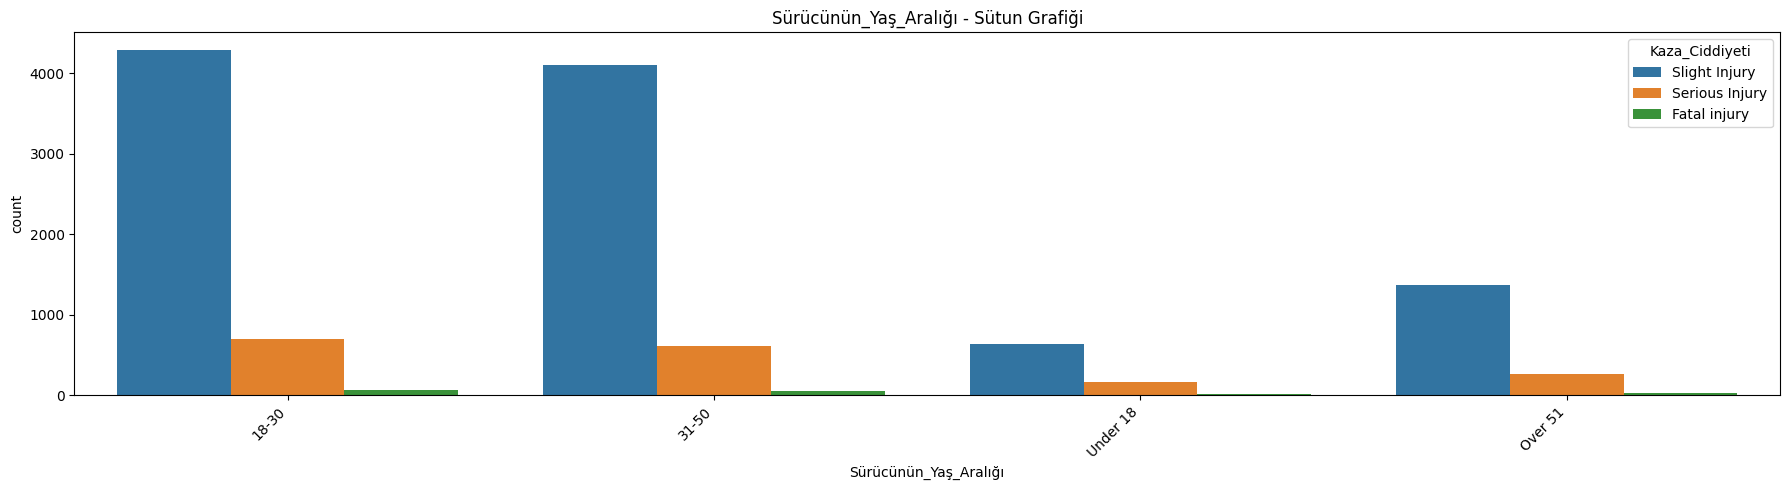

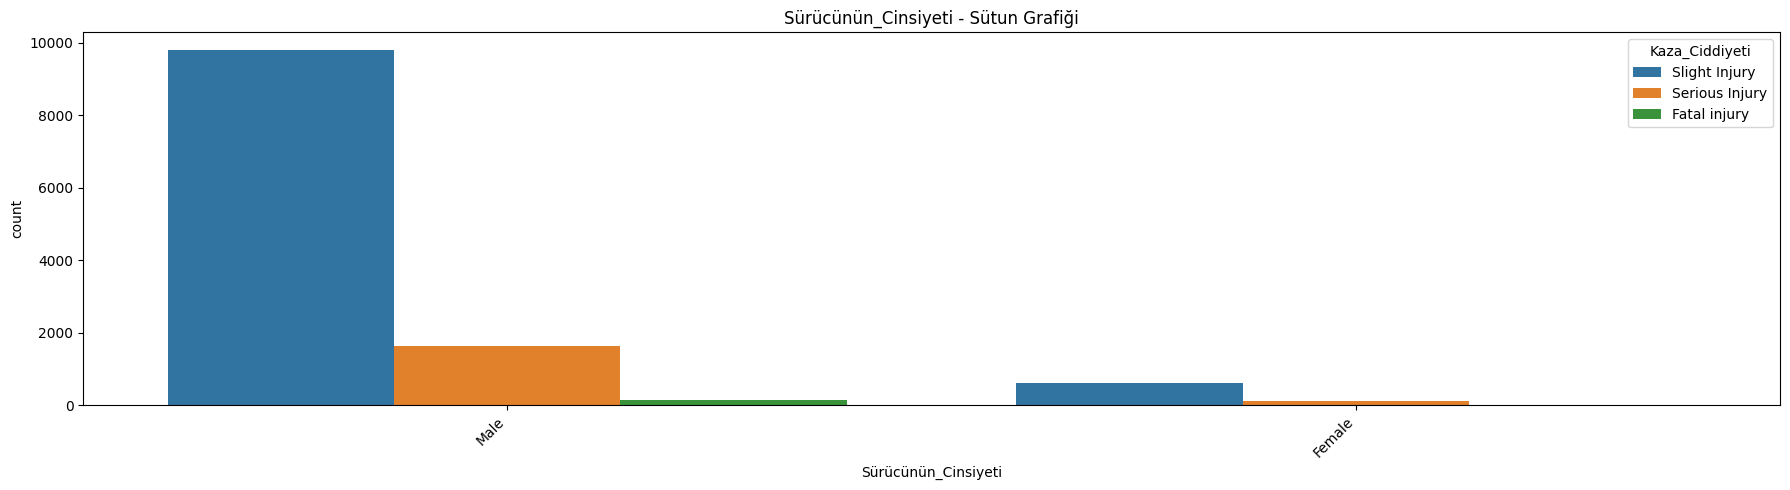

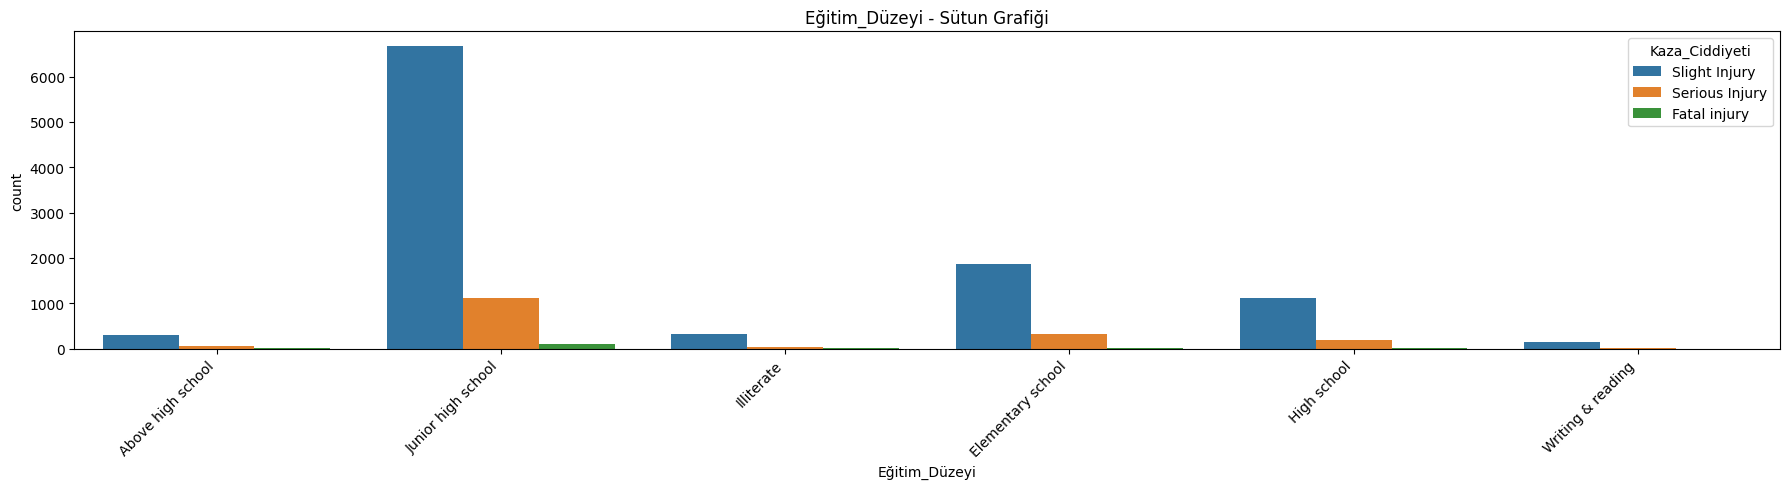

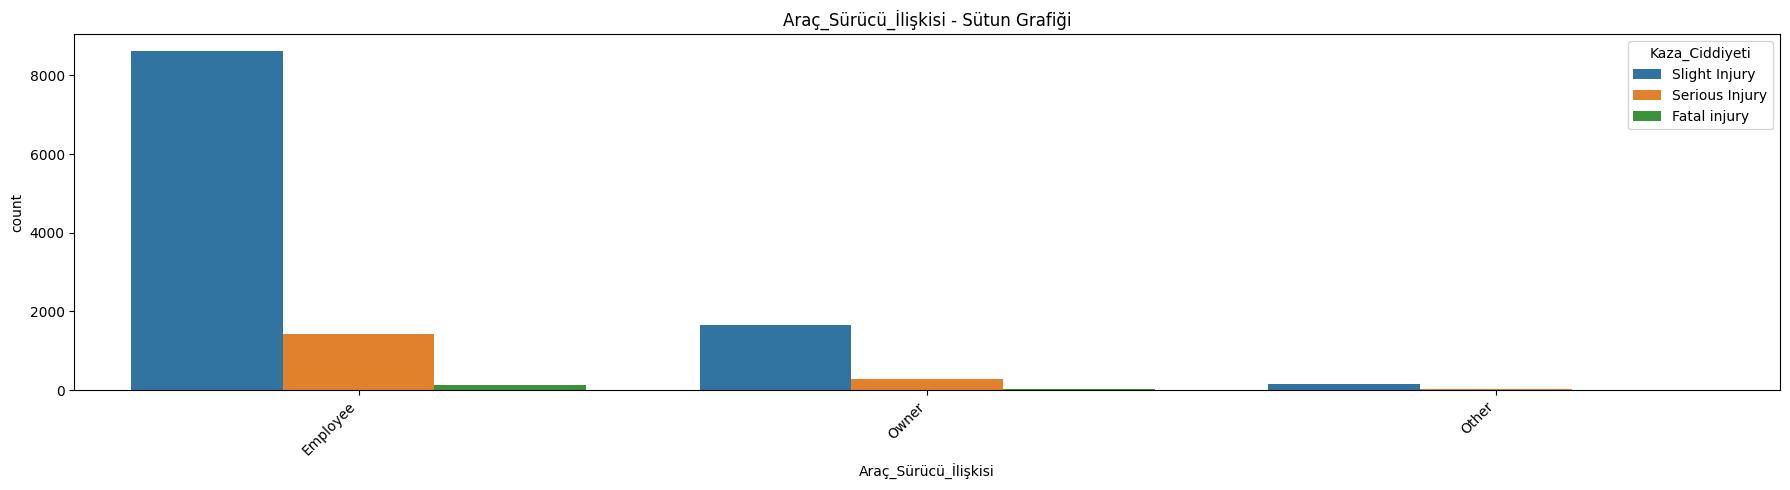

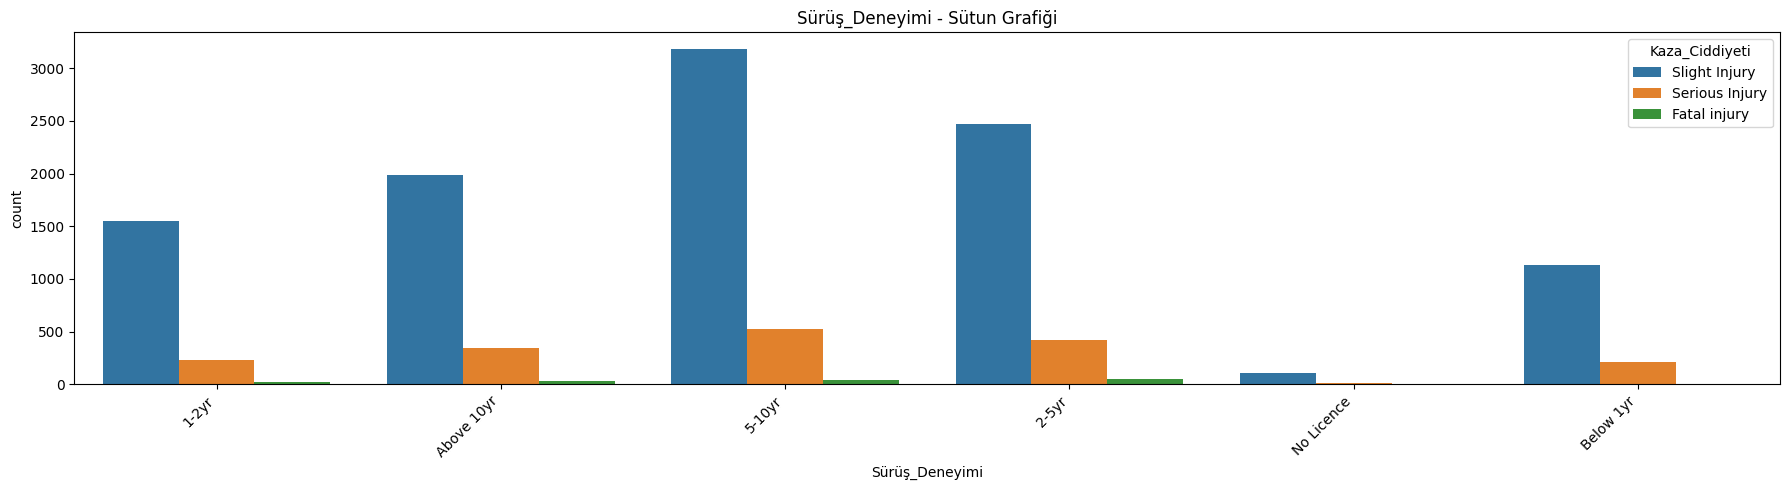

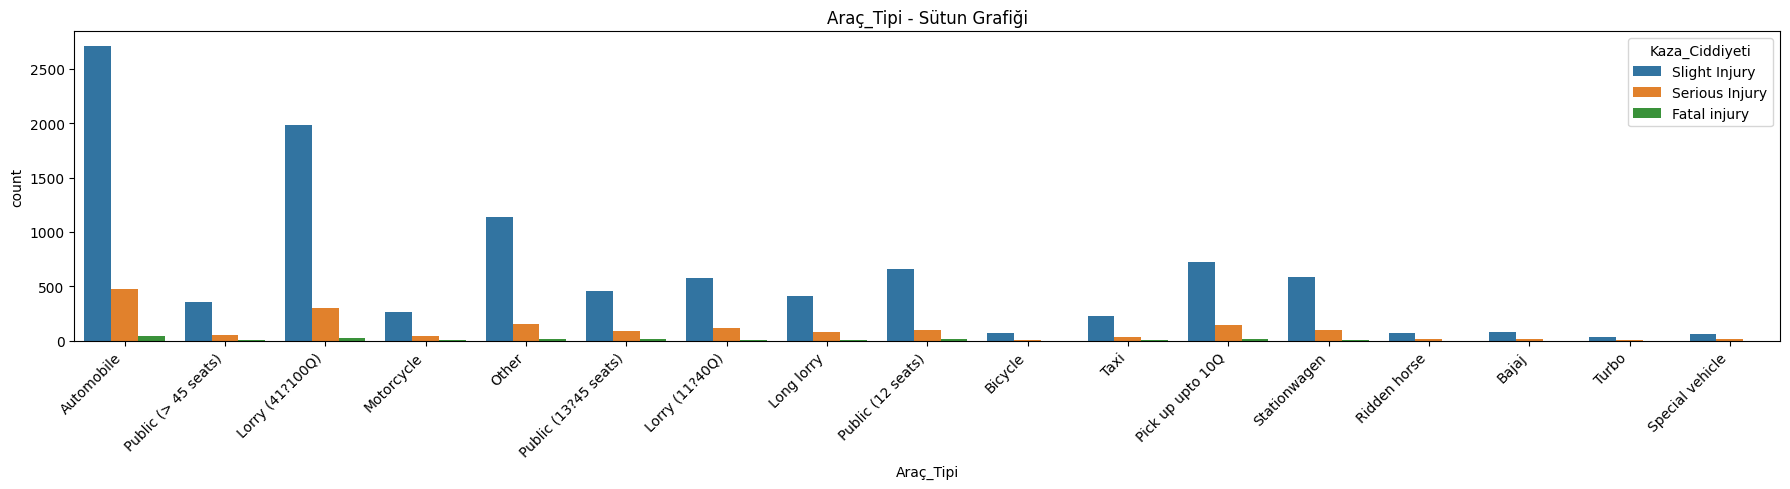

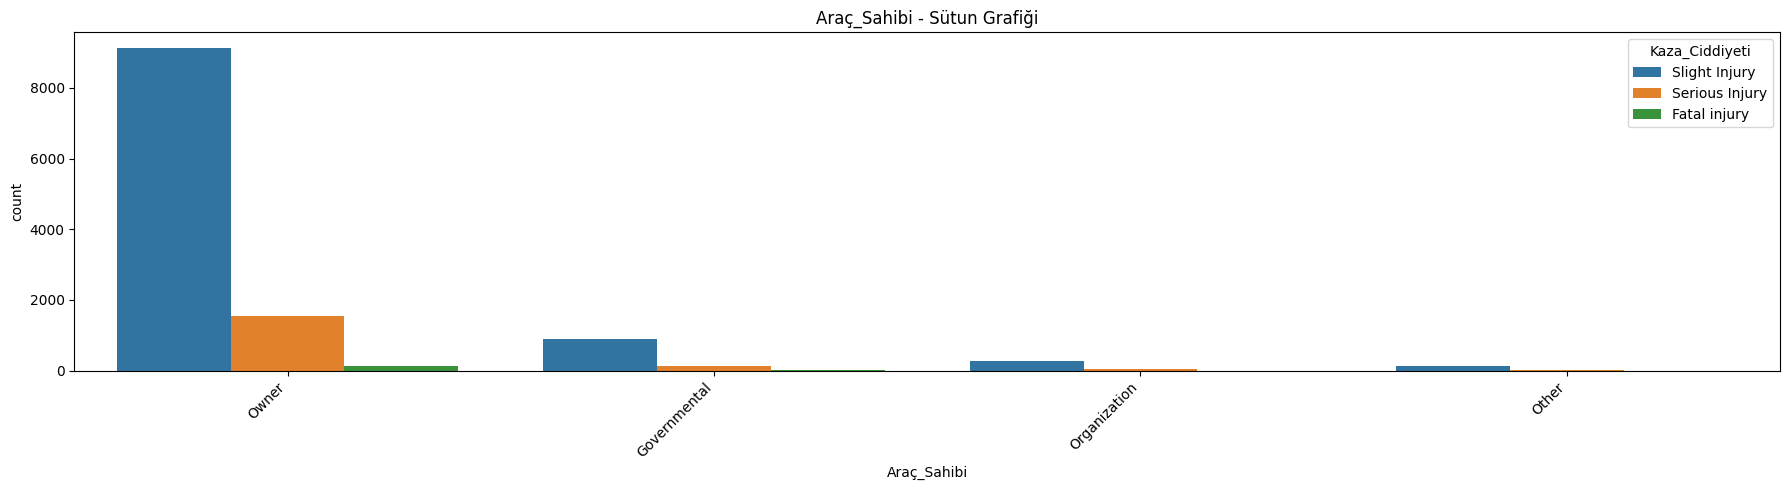

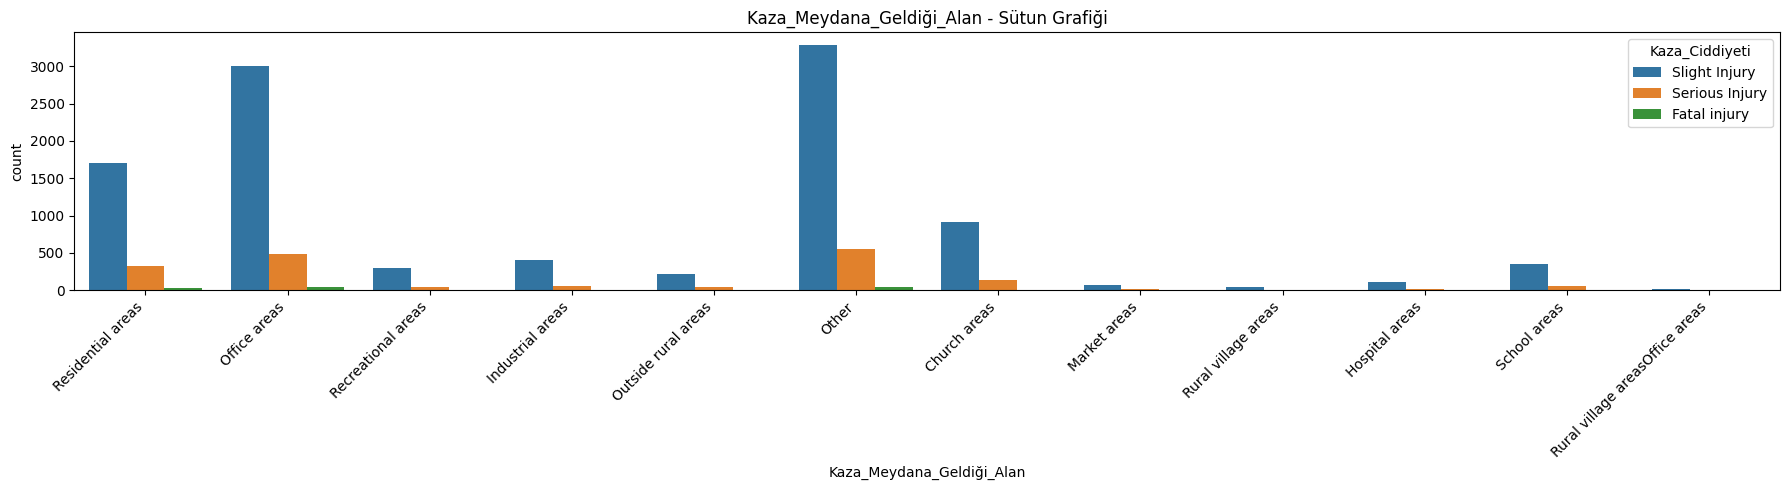

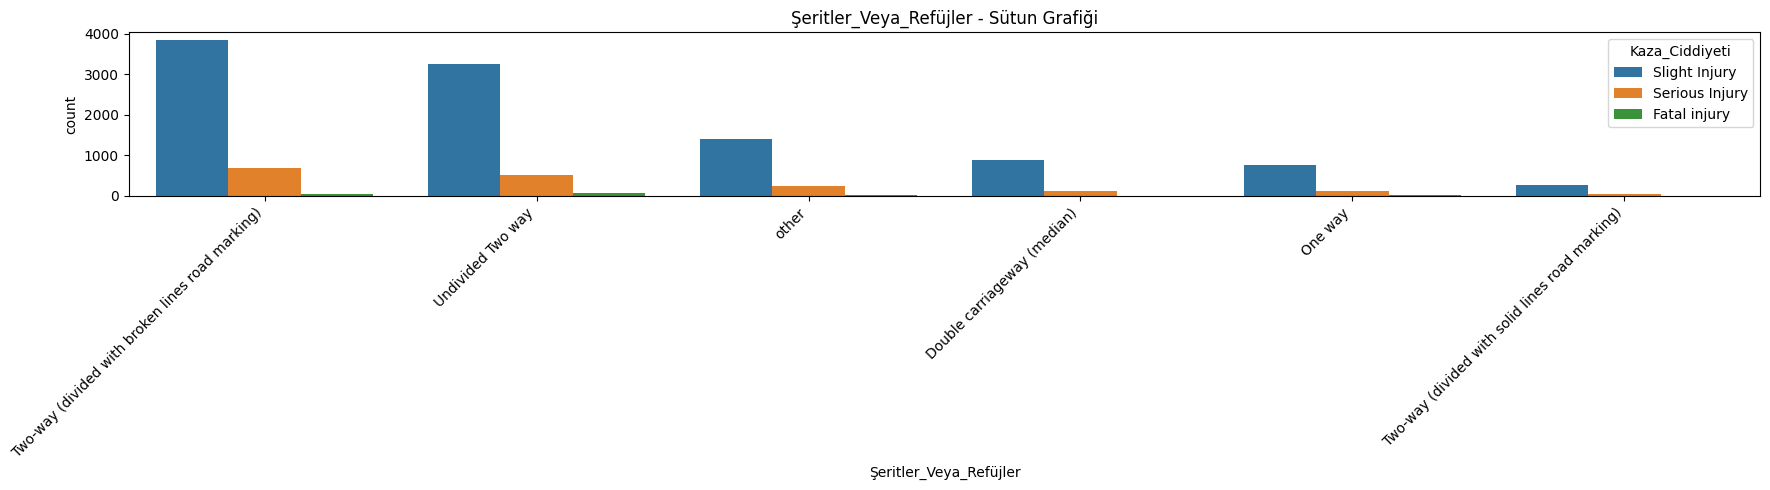

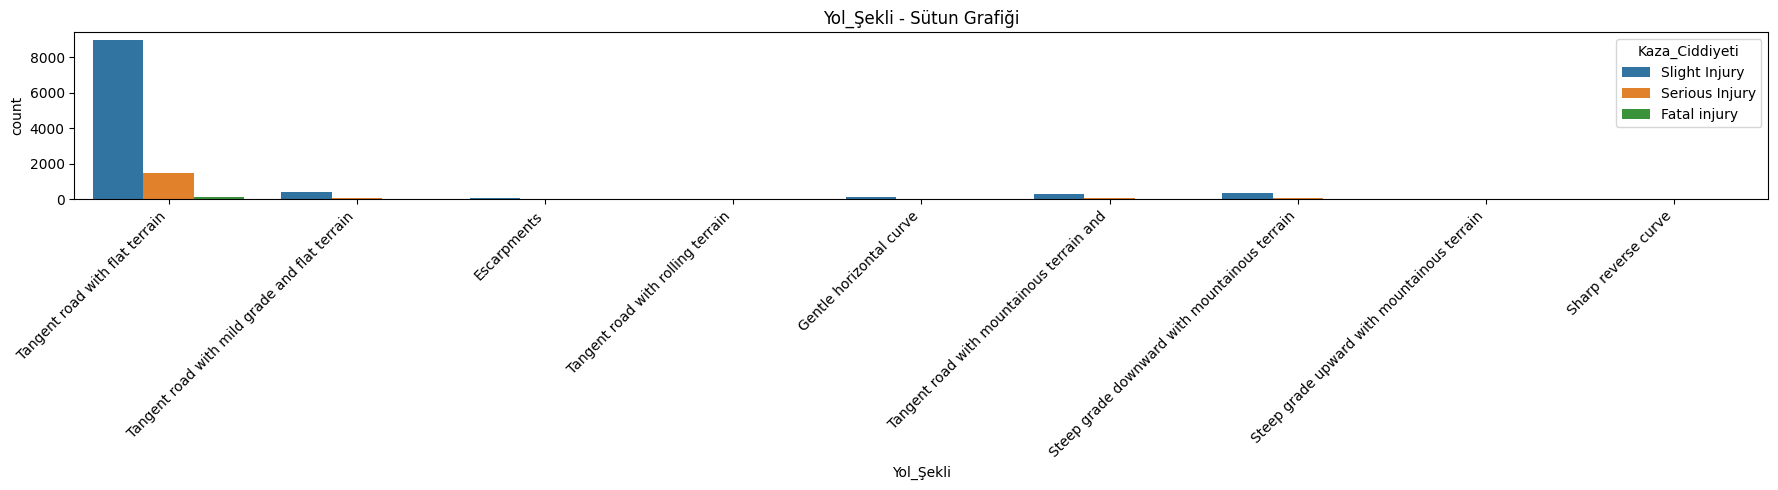

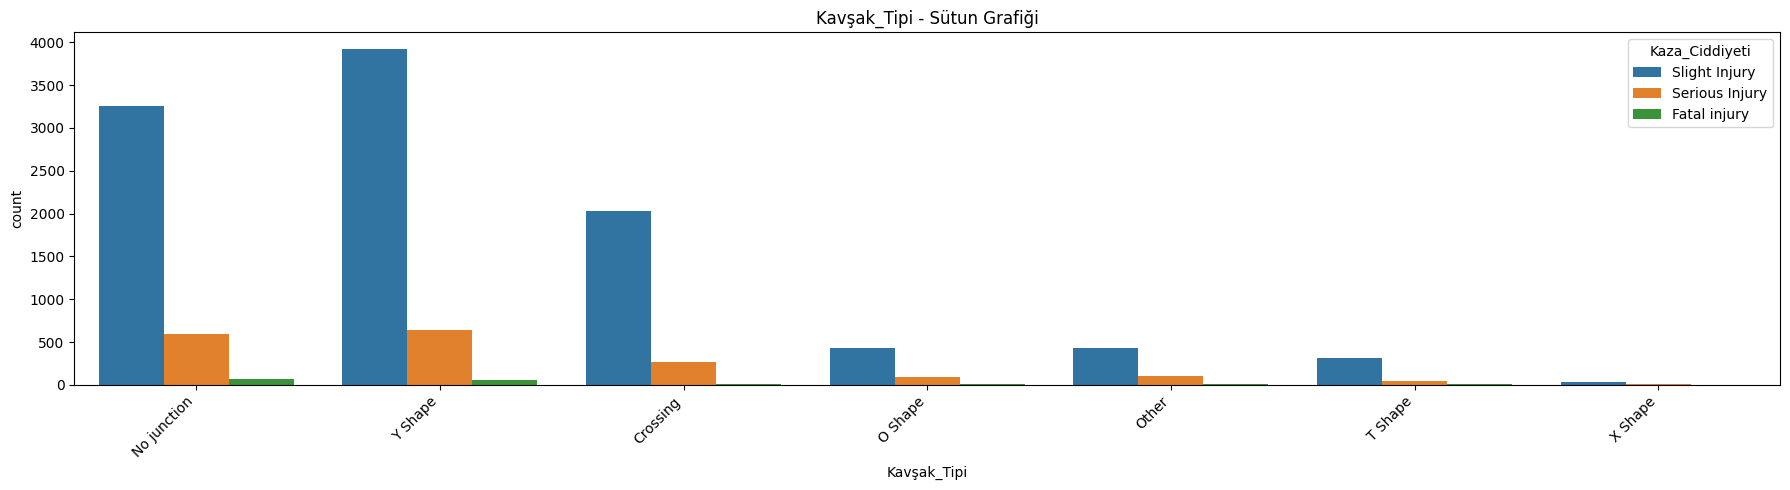

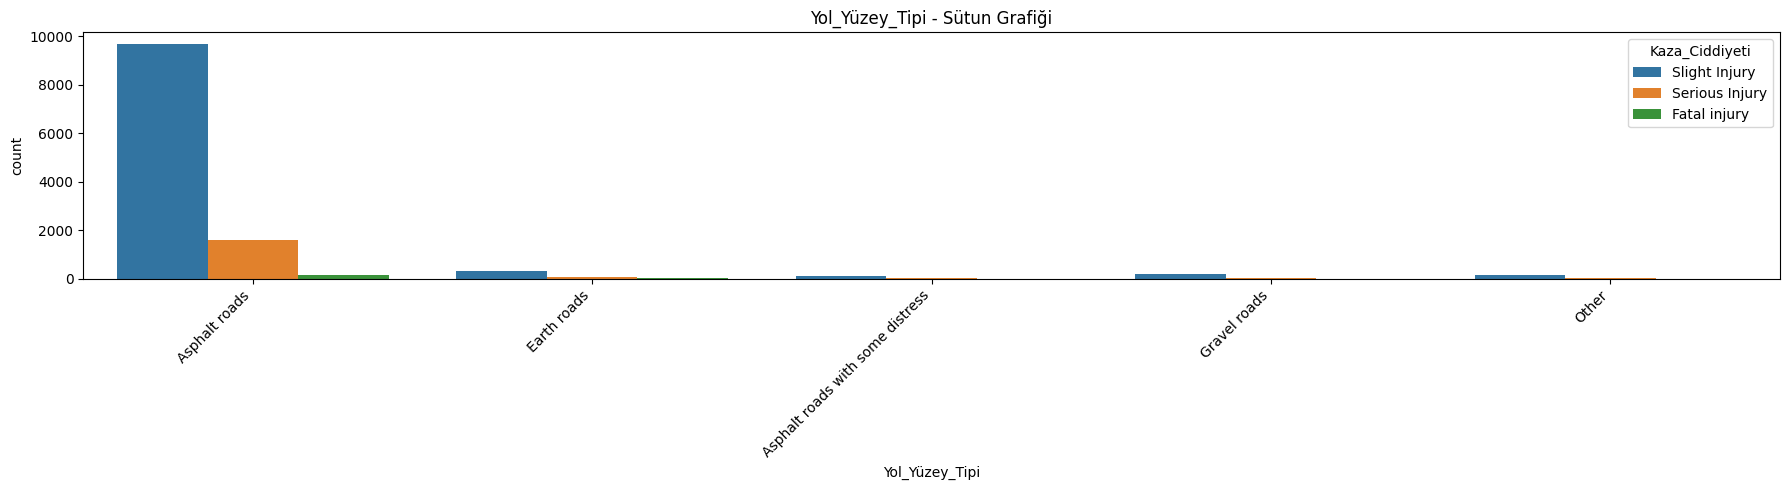

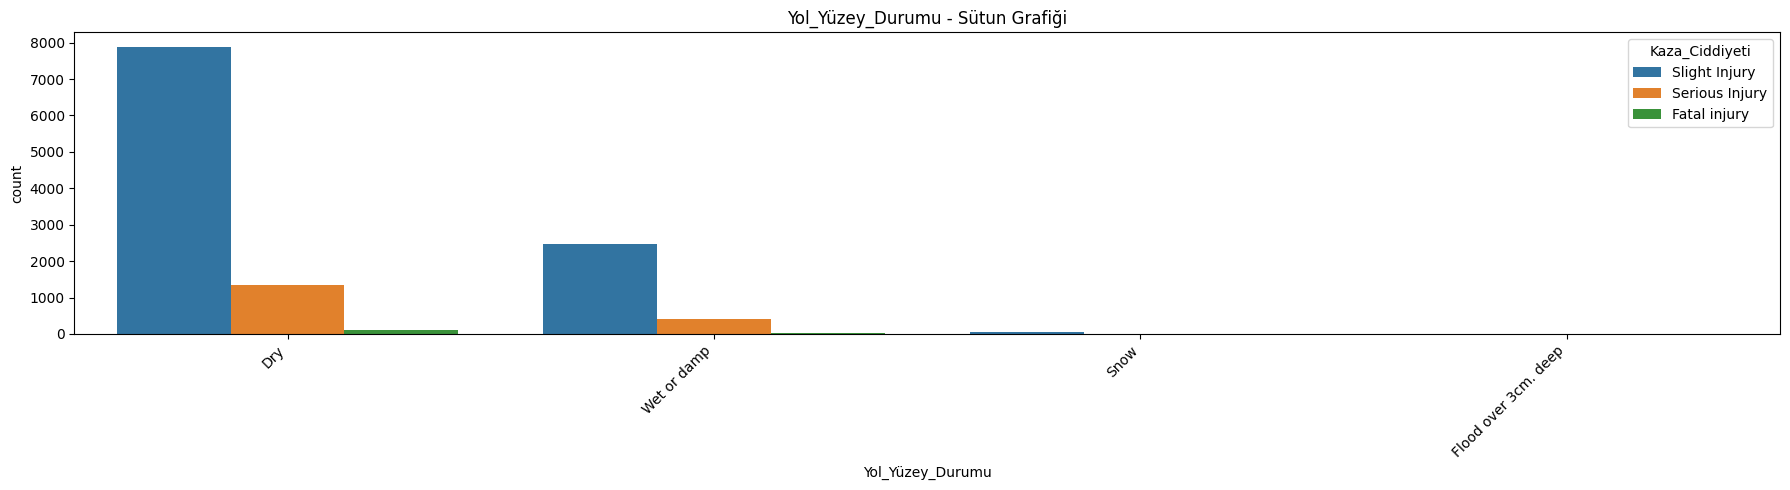

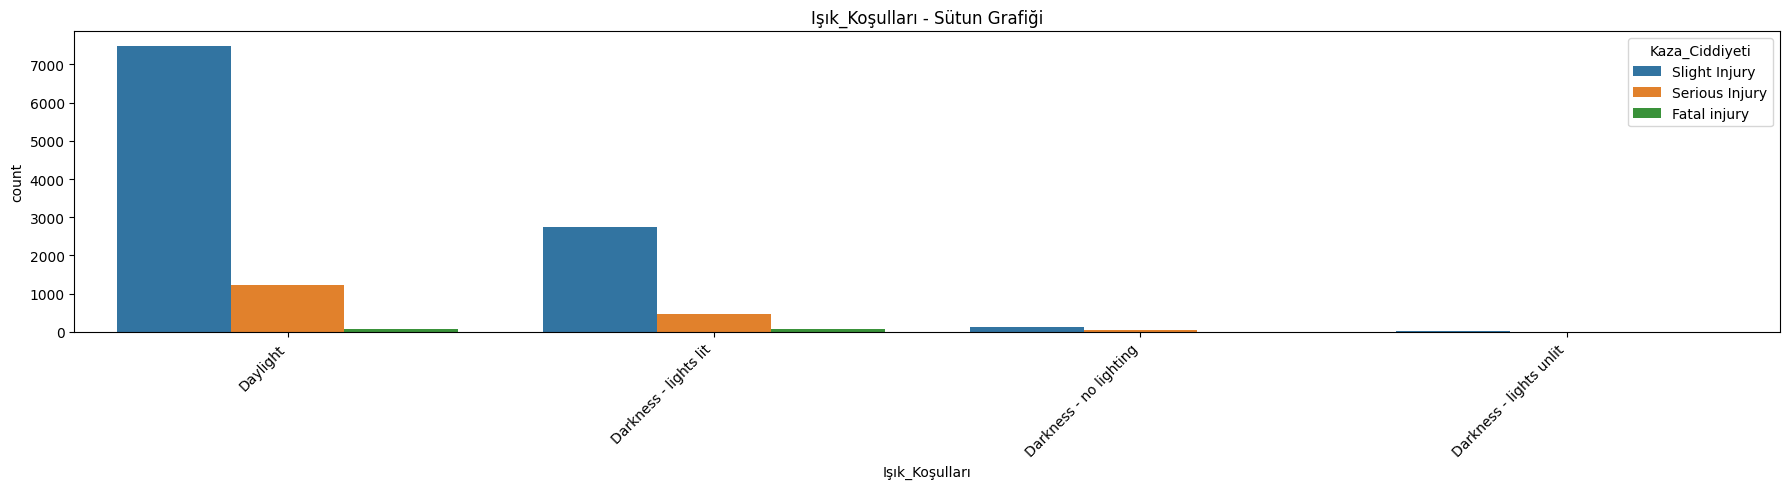

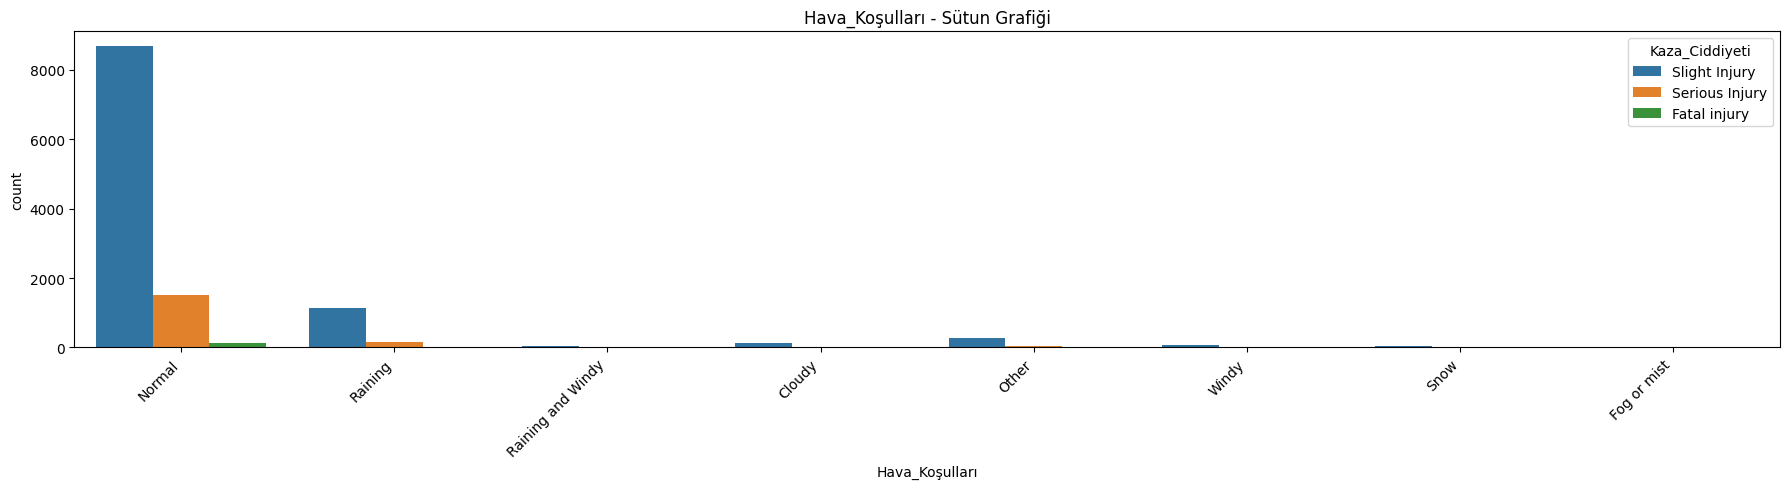

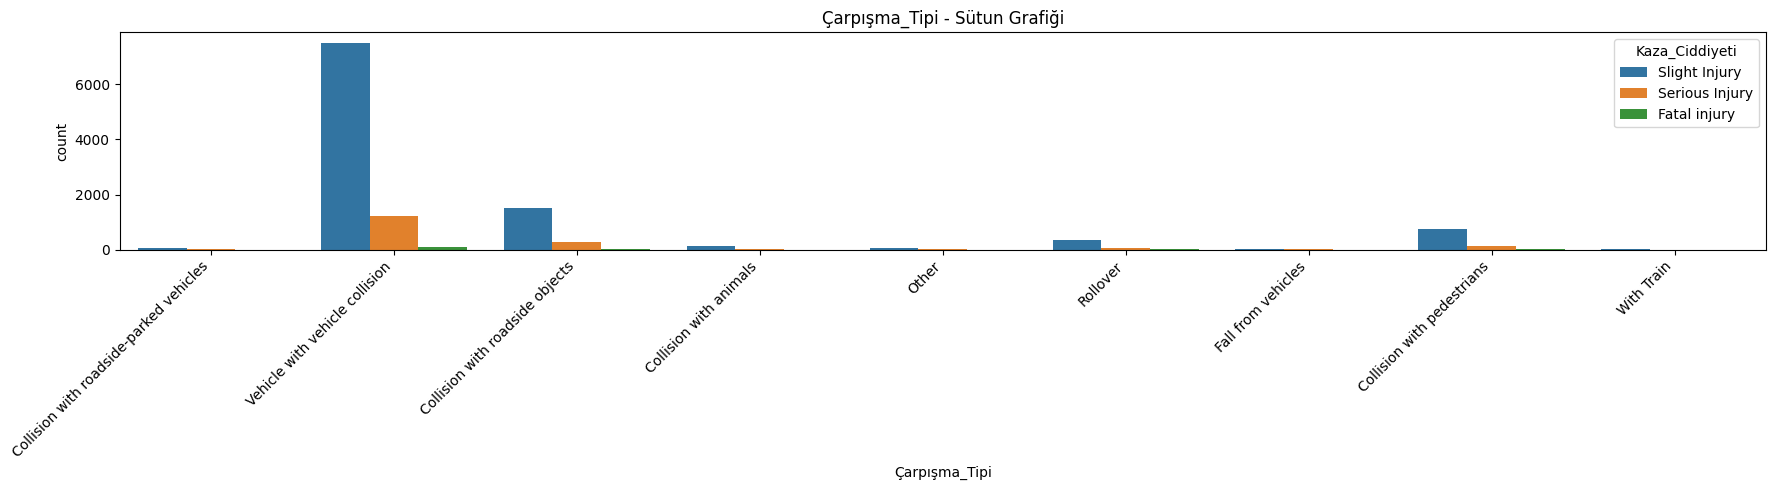

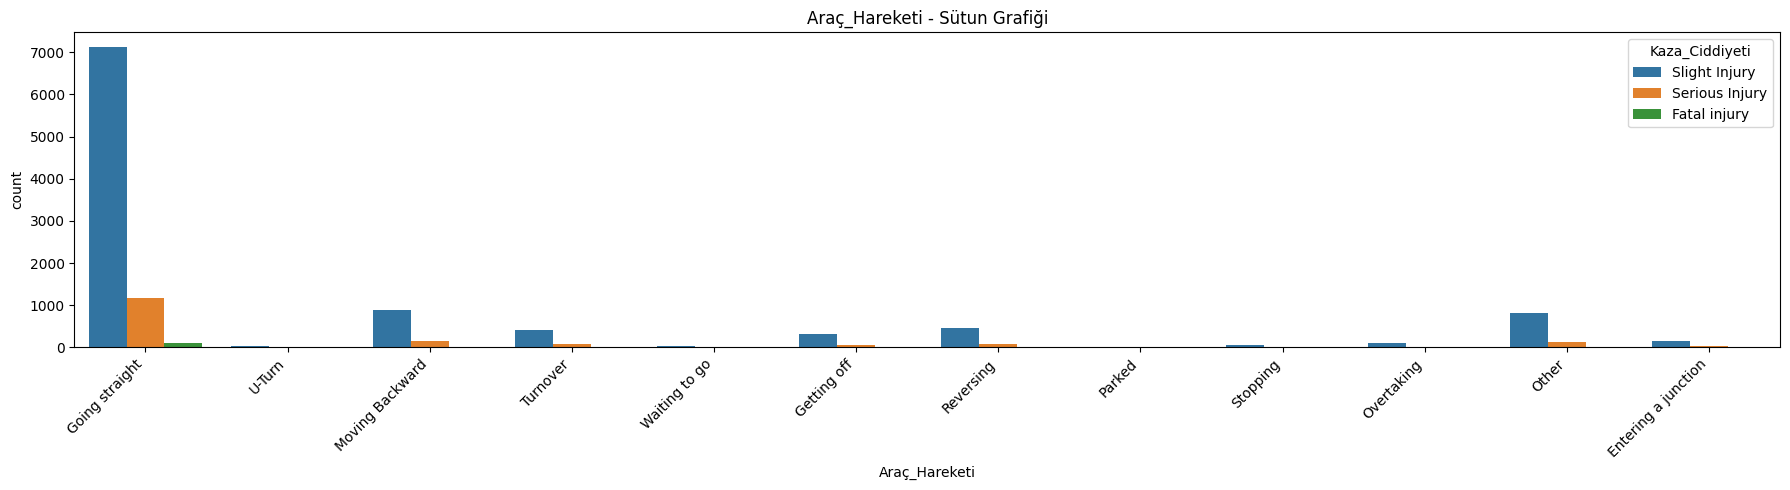

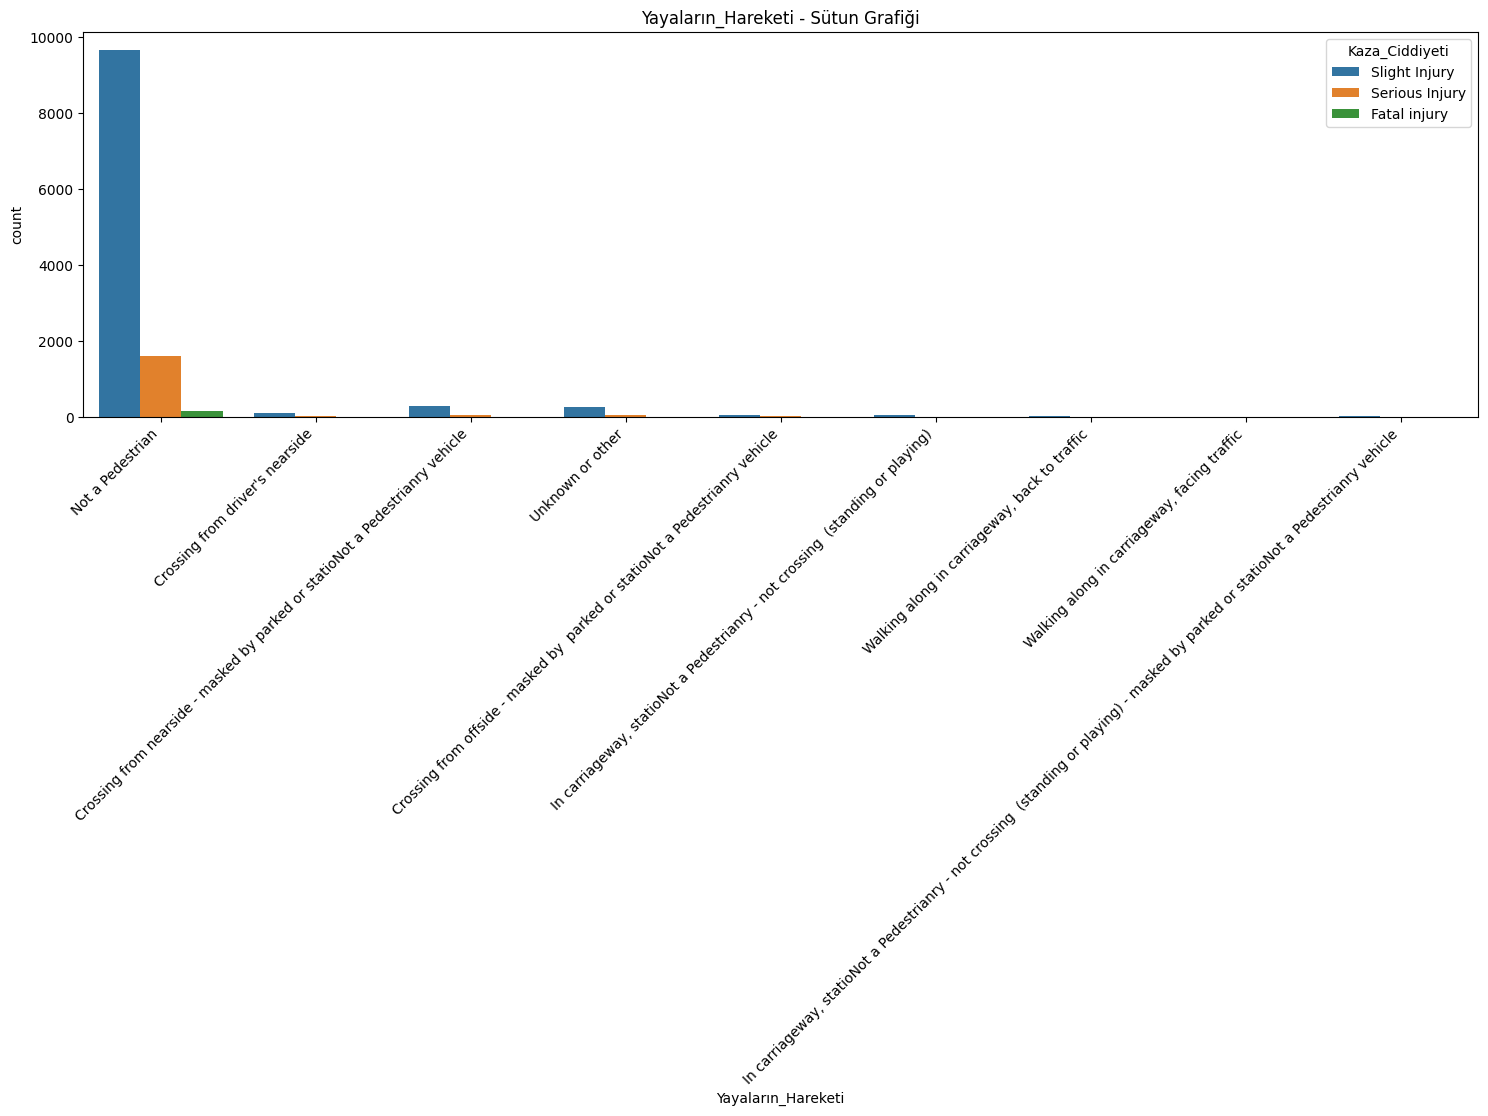

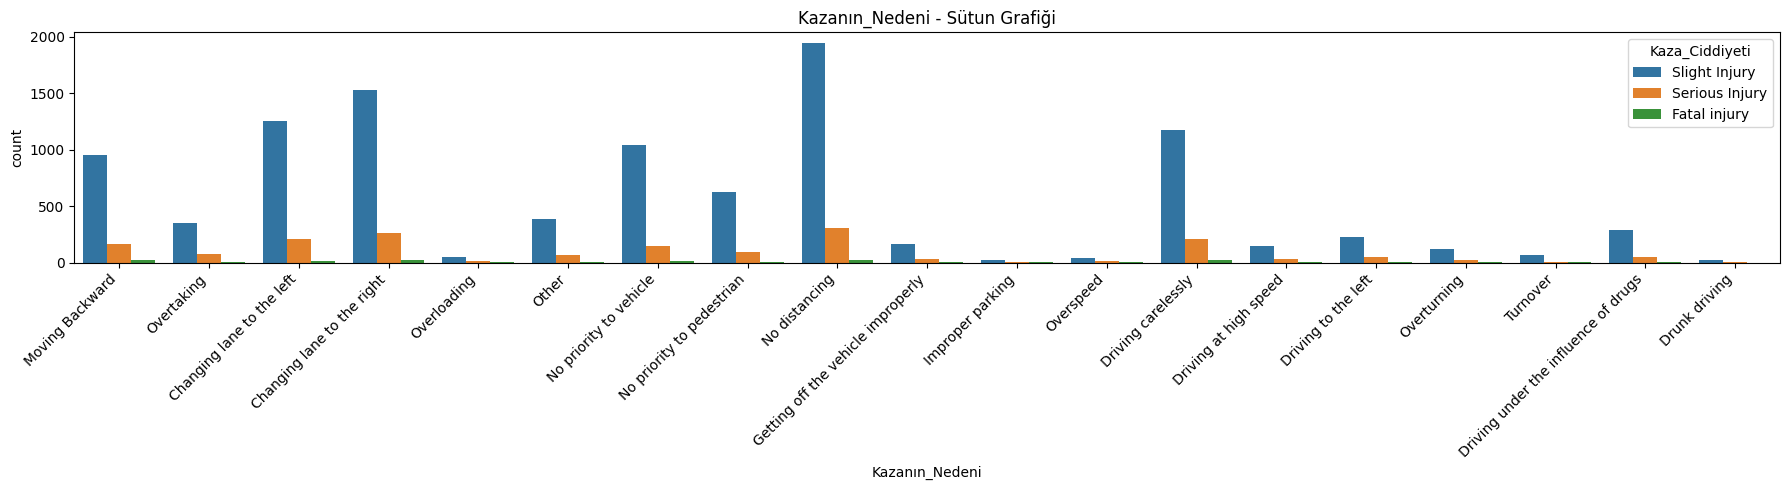

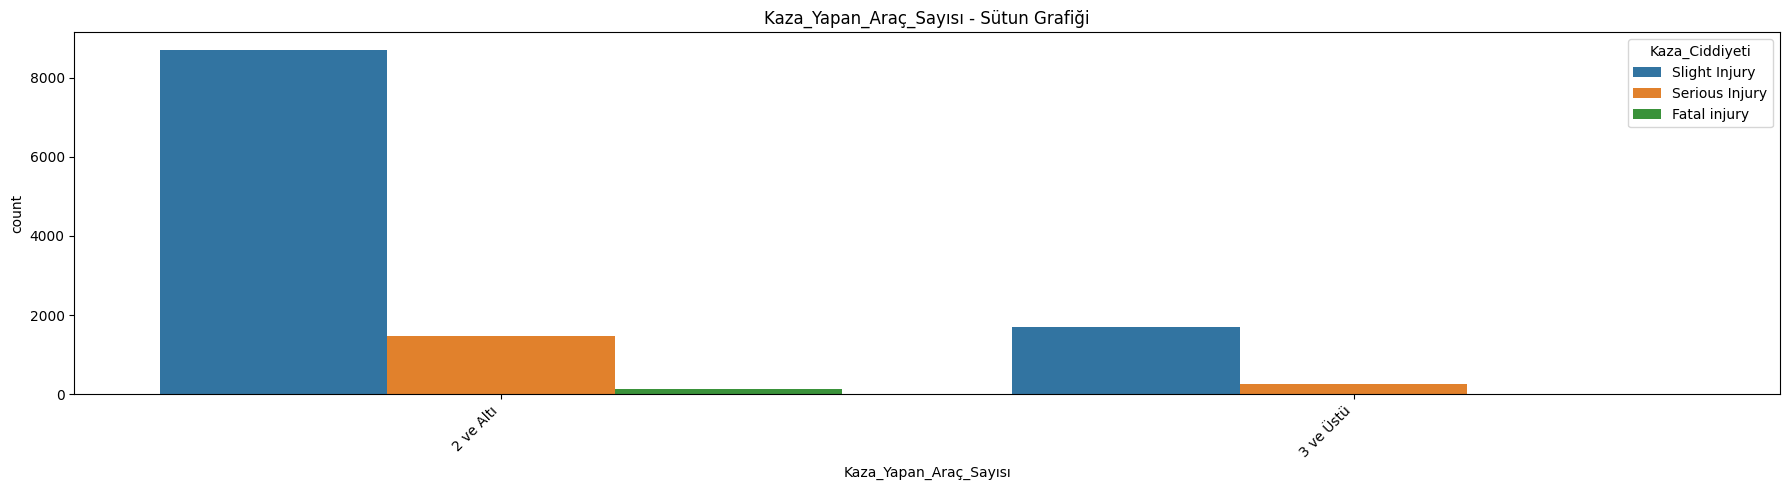

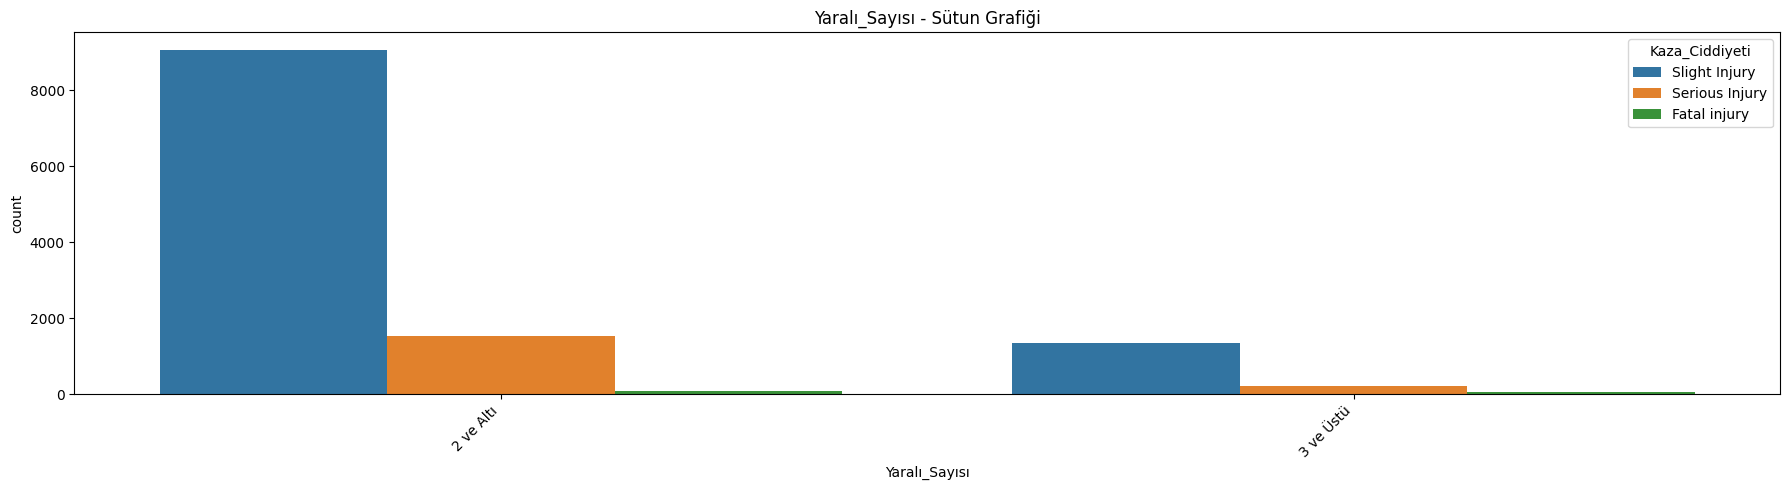

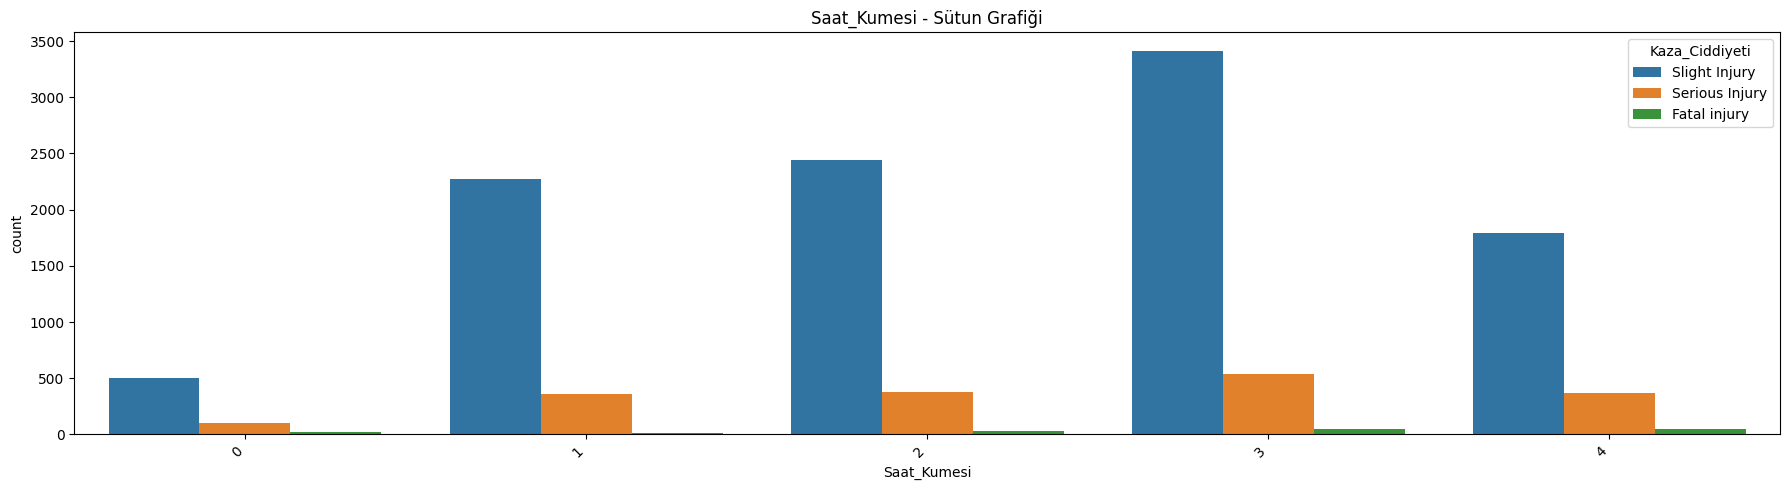

In [23]:
kategorik_sutunlar = [
    "Haftanın_Günü", "Sürücünün_Yaş_Aralığı", "Sürücünün_Cinsiyeti", "Eğitim_Düzeyi",
    "Araç_Sürücü_İlişkisi", "Sürüş_Deneyimi", "Araç_Tipi", "Araç_Sahibi",
    "Kaza_Meydana_Geldiği_Alan", "Şeritler_Veya_Refüjler", "Yol_Şekli", "Kavşak_Tipi",
    "Yol_Yüzey_Tipi", "Yol_Yüzey_Durumu", "Işık_Koşulları", "Hava_Koşulları",
    "Çarpışma_Tipi", "Araç_Hareketi", "Yayaların_Hareketi", "Kazanın_Nedeni",
    "Kaza_Yapan_Araç_Sayısı", "Yaralı_Sayısı", "Saat_Kumesi"
]

hedef = "Kaza_Ciddiyeti"

# Grafikler
for sutun in kategorik_sutunlar:
    plt.figure(figsize=(18, 5))

    # Countplot (sütun grafiği)
    plt.subplot(1, 1, 1)
    sns.countplot(data=df2_final, x=sutun, hue=hedef)
    plt.title(f'{sutun} - Sütun Grafiği')
    plt.xticks(rotation=45, ha='right')


    plt.tight_layout()
    plt.show()

kaza_ciddiyeti_dict = {
    'Fatal injury': 'Ağır',
    'Serious Injury': 'Orta',
    'Slight Injury': 'Hafif'
}

## Etiketlerin Girdilere Göre Yüzdelik Dağılımları

In [24]:
sonuclar = {}

for sutun in kategorik_sutunlar:
    yuzde_dağılım = df2_final.groupby([sutun, 'Kaza_Ciddiyeti']).size().unstack().fillna(0)
    
    yuzde_dağılım = yuzde_dağılım.apply(lambda x: 100 * x / x.sum(), axis=1)
    
    yuzde_dağılım = yuzde_dağılım.rename(index=kaza_ciddiyeti_dict)
    
    sonuclar[sutun] = yuzde_dağılım
for sutun, sonuc in sonuclar.items():
    print(f"--- {sutun} ---")
    print(sonuc)
    print("\n")

--- Haftanın_Günü ---
Kaza_Ciddiyeti  Fatal injury  Serious Injury  Slight Injury
Haftanın_Günü                                              
Friday              0.783929       15.335620      83.880451
Monday              0.713861       12.135634      87.150506
Saturday            2.220888       14.705882      83.073229
Sunday              2.385821       12.951602      84.662577
Thursday            1.188547       14.694760      84.116694
Tuesday             0.960452       14.519774      84.519774
Wednesday           1.032609       14.239130      84.728261


--- Sürücünün_Yaş_Aralığı ---
Kaza_Ciddiyeti         Fatal injury  Serious Injury  Slight Injury
Sürücünün_Yaş_Aralığı                                             
18-30                      1.264322       13.887791      84.847886
31-50                      1.215169       12.717369      86.067463
Over 51                    1.449275       15.942029      82.608696
Under 18                   1.454545       20.484848      78.060606


--

In [25]:
df2_final

,Haftanın_Günü,Sürücünün_Yaş_Aralığı,Sürücünün_Cinsiyeti,Eğitim_Düzeyi,Araç_Sürücü_İlişkisi,Sürüş_Deneyimi,Araç_Tipi,Araç_Sahibi,Kaza_Meydana_Geldiği_Alan,Şeritler_Veya_Refüjler,Yol_Şekli,Kavşak_Tipi,Yol_Yüzey_Tipi,Yol_Yüzey_Durumu,Işık_Koşulları,Hava_Koşulları,Çarpışma_Tipi,Araç_Hareketi,Yayaların_Hareketi,Kazanın_Nedeni,Kaza_Ciddiyeti,Kaza_Yapan_Araç_Sayısı,Yaralı_Sayısı,Saat_Kumesi
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,Two-way (divided with broken lines road marking),Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,Not a Pedestrian,Moving Backward,Slight Injury,2 ve Altı,2 ve Altı,3
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,Slight Injury,2 ve Altı,2 ve Altı,3
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,other,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,Going straight,Not a Pedestrian,Changing lane to the left,Serious Injury,2 ve Altı,2 ve Altı,3
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Changing lane to the right,Slight Injury,2 ve Altı,2 ve Altı,0
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Motorcycle,Owner,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,Slight Injury,2 ve Altı,2 ve Altı,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,Wednesday,31-50,Male,Junior high school,Employee,2-5yr,Lorry (11?40Q),Owner,Outside rural areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,No distancing,Slight Injury,2 ve Altı,2 ve Altı,3
12312,Sunday,31-50,Male,Elementary school,Employee,5-10yr,Automobile,Owner,Outside rural areas,Two-way (divided with broken lines road marking),Escarpments,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,Other,Not a Pedestrian,No distancing,Slight Injury,2 ve Altı,2 ve Altı,3
12313,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,Outside rural areas,Two-way (divided with broken lines road marking),Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,Other,Not a Pedestrian,Changing lane to the right,Serious Injury,2 ve Altı,2 ve Altı,2
12314,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,Office areas,Undivided Two way,Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,Other,Not a Pedestrian,Driving under the influence of drugs,Slight Injury,2 ve Altı,2 ve Altı,2


## Korelasyon Matrisi

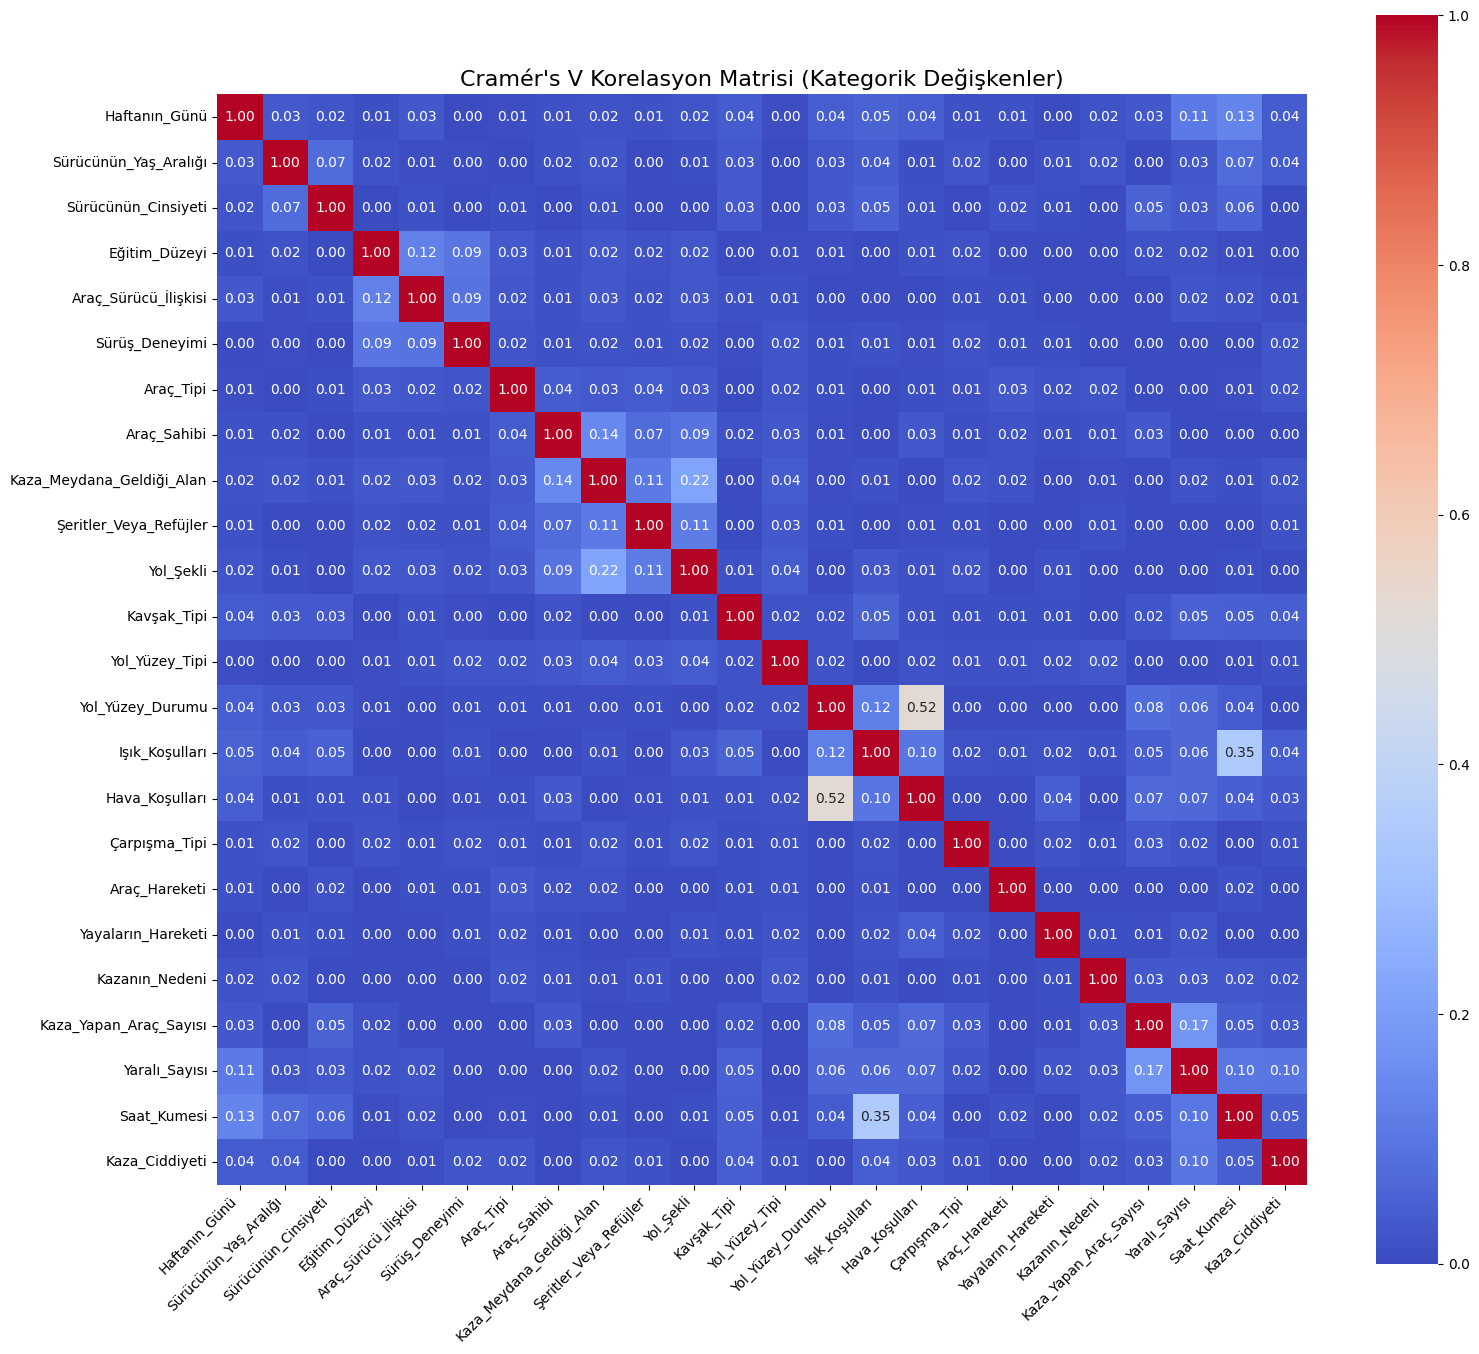

In [26]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2_corr = max(0, phi2 - ((k - 1)*(r - 1)) / (n - 1))
    r_corr = r - ((r - 1)**2) / (n - 1)
    k_corr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2_corr / min((k_corr - 1), (r_corr - 1)))

x_sutunlari = [col for col in df2_final.columns if col != 'Kaza_Ciddiyeti']
tum_sutunlar = x_sutunlari + ['Kaza_Ciddiyeti']


korelasyon_matrisi = pd.DataFrame(index=tum_sutunlar, columns=tum_sutunlar)

for col1 in tum_sutunlar:
    for col2 in tum_sutunlar:
        try:
            korelasyon_matrisi.loc[col1, col2] = cramers_v(df2_final[col1], df2_final[col2])
        except:
            korelasyon_matrisi.loc[col1, col2] = np.nan

korelasyon_matrisi = korelasyon_matrisi.astype(float)

plt.figure(figsize=(16, 14))
sns.heatmap(korelasyon_matrisi, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Cramér's V Korelasyon Matrisi (Kategorik Değişkenler)", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Özellik Seçimi

In [27]:
X = df2_final.drop("Kaza_Ciddiyeti", axis=1)
y = df2_final["Kaza_Ciddiyeti"]

In [28]:
En_Cok2 = [
    "Yaralı_Sayısı",
    "Saat_Kumesi"
]
En_Cok6 = [
    "Yaralı_Sayısı",
    "Saat_Kumesi",
    "Işık_Koşulları",
    "Kavşak_Tipi",
    "Haftanın_Günü",
    "Sürücünün_Yaş_Aralığı"
]
En_Cok8 = [
    "Yaralı_Sayısı",
    "Saat_Kumesi",
    "Işık_Koşulları",
    "Kavşak_Tipi",
    "Haftanın_Günü",
    "Sürücünün_Yaş_Aralığı",
    "Kaza_Yapan_Araç_Sayısı",
    "Hava_Koşulları"
]
En_Cok12 = [
    "Yaralı_Sayısı",
    "Saat_Kumesi",
    "Işık_Koşulları",
    "Kavşak_Tipi",
    "Haftanın_Günü",
    "Sürücünün_Yaş_Aralığı",
    "Kaza_Yapan_Araç_Sayısı",
    "Hava_Koşulları",
    "Sürüş_Deneyimi",
    "Araç_Tipi",
    "Kaza_Meydana_Geldiği_Alan",
    "Kazanın_Nedeni"    
]

X_matrise_gore_2 = df2_final[En_Cok2].copy()
X_matrise_gore_6 = df2_final[En_Cok6].copy()
X_matrise_gore_8 = df2_final[En_Cok8].copy()
X_matrise_gore_12 = df2_final[En_Cok12].copy()

In [29]:
label_encoder = LabelEncoder()
for sütun in X.columns:
    if X[sütun].dtype == 'object' or X[sütun].dtype.name == 'category':
        X[sütun] = label_encoder.fit_transform(X[sütun])

for sütun in X_matrise_gore_2.columns:
    if X_matrise_gore_2[sütun].dtype == 'object' or X_matrise_gore_2[sütun].dtype.name == 'category':
        X_matrise_gore_2[sütun] = label_encoder.fit_transform(X_matrise_gore_2[sütun])

for sütun in X_matrise_gore_6.columns:
    if X_matrise_gore_6[sütun].dtype == 'object' or X_matrise_gore_6[sütun].dtype.name == 'category':
        X_matrise_gore_6[sütun] = label_encoder.fit_transform(X_matrise_gore_6[sütun])

for sütun in X_matrise_gore_8.columns:
    if X_matrise_gore_8[sütun].dtype == 'object' or X_matrise_gore_8[sütun].dtype.name == 'category':
        X_matrise_gore_8[sütun] = label_encoder.fit_transform(X_matrise_gore_8[sütun])

for sütun in X_matrise_gore_12.columns:
    if X_matrise_gore_12[sütun].dtype == 'object' or X_matrise_gore_12[sütun].dtype.name == 'category':
        X_matrise_gore_12[sütun] = label_encoder.fit_transform(X_matrise_gore_12[sütun])

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

X_train_2, X_test_2, y_train2, y_test2 = train_test_split(
    X_matrise_gore_2, y, test_size=0.25, random_state=42, stratify=y
)

X_train_6, X_test_6, y_train6, y_test6 = train_test_split(
    X_matrise_gore_6, y, test_size=0.25, random_state=42, stratify=y
)
X_train_8, X_test_8, y_train8, y_test8 = train_test_split(
    X_matrise_gore_8, y, test_size=0.25, random_state=42, stratify=y
)
X_train_12, X_test_12, y_train12, y_test12 = train_test_split(
    X_matrise_gore_12, y, test_size=0.25, random_state=42, stratify=y
)

In [31]:
from sklearn.feature_selection import SelectKBest, chi2

selector_chi2 = SelectKBest(score_func=chi2, k=10) 
selector_chi2.fit(X_train, y_train)


secilen_indeksler = selector_chi2.get_support(indices=True)
secilen_sutunlar = X_train.columns[secilen_indeksler]

print("Chi2 ile seçilen 10 özellik:")
print(secilen_sutunlar)

selector_chi2_2 = SelectKBest(score_func=chi2, k=6) 
selector_chi2_2.fit(X_train, y_train)


secilen_indeksler2 = selector_chi2_2.get_support(indices=True)
secilen_sutunlar2 = X_train.columns[secilen_indeksler2]

print("Chi2 ile seçilen 6 özellik:")
print(secilen_sutunlar2)

Chi2 ile seçilen 10 özellik:
Index(['Sürücünün_Yaş_Aralığı', 'Araç_Sürücü_İlişkisi', 'Sürüş_Deneyimi',
       'Yol_Yüzey_Tipi', 'Işık_Koşulları', 'Çarpışma_Tipi', 'Kazanın_Nedeni',
       'Kaza_Yapan_Araç_Sayısı', 'Yaralı_Sayısı', 'Saat_Kumesi'],
      dtype='object')
Chi2 ile seçilen 6 özellik:
Index(['Sürücünün_Yaş_Aralığı', 'Araç_Sürücü_İlişkisi', 'Çarpışma_Tipi',
       'Kazanın_Nedeni', 'Kaza_Yapan_Araç_Sayısı', 'Yaralı_Sayısı'],
      dtype='object')


In [32]:
chi2_10 = [
    "Yaralı_Sayısı",
    "Saat_Kumesi", 
    "Işık_Koşulları",
    "Sürücünün_Yaş_Aralığı", 
    "Araç_Sürücü_İlişkisi", 
    "Sürüş_Deneyimi", 
    "Kaza_Yapan_Araç_Sayısı", 
    "Yol_Yüzey_Tipi",
    "Çarpışma_Tipi", 
    "Kazanın_Nedeni"    
]
chi2_6 = [
    "Yaralı_Sayısı",
    "Sürücünün_Yaş_Aralığı", 
    "Araç_Sürücü_İlişkisi", 
    "Kaza_Yapan_Araç_Sayısı", 
    "Çarpışma_Tipi", 
    "Kazanın_Nedeni"    
]

X_chi2_10 = df2_final[chi2_10].copy()
X_chi2_6 = df2_final[chi2_6].copy()

for sütun in X_chi2_10.columns:
    if X_chi2_10[sütun].dtype == 'object' or X_chi2_10[sütun].dtype.name == 'category':
        X_chi2_10[sütun] = label_encoder.fit_transform(X_chi2_10[sütun])

for sütun in X_chi2_6.columns:
    if X_chi2_6[sütun].dtype == 'object' or X_chi2_6[sütun].dtype.name == 'category':
        X_chi2_6[sütun] = label_encoder.fit_transform(X_chi2_6[sütun])

X_train_chi2_10, X_test_chi2_10, y_train_chi2_10, y_test_chi2_10 = train_test_split(
    X_chi2_10, y, test_size=0.25, random_state=42, stratify=y
)
X_train_chi2_6, X_test_chi2_6, y_train_chi2_6, y_test_chi2_6 = train_test_split(
    X_chi2_6, y, test_size=0.25, random_state=42, stratify=y
)

## Seçilen Özellik Gruplarından Hangisi Daha İyi Test Ediyoruz

In [33]:
random.seed(42)
np.random.seed(42)

In [34]:
modeller = {
    "Naive Bayes": GaussianNB(),
    "Karar Ağacı": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Yapay Sinir Ağı": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
}

# Tüm veri kümeleri
veri_kumeleri = {
    "Orijinal": (X_train, X_test, y_train, y_test),
    "2 Özellik": (X_train_2, X_test_2, y_train2, y_test2),
    "6 Özellik": (X_train_6, X_test_6, y_train6, y_test6),
    "8 Özellik": (X_train_8, X_test_8, y_train8, y_test8),
    "12 Özellik": (X_train_12, X_test_12, y_train12, y_test12),
    "Chi2 - 10 Özellik": (X_train_chi2_10, X_test_chi2_10, y_train_chi2_10, y_test_chi2_10),
    "Chi2 - 6 Özellik": (X_train_chi2_6, X_test_chi2_6, y_train_chi2_6, y_test_chi2_6)
}

# Her veri kümesi için modelleri çalıştır
for veri_adi, (X_tr, X_te, y_tr, y_te) in veri_kumeleri.items():
    print(f"\n📁 Veri Kümesi: {veri_adi}")
    print("=" * 60)
    
    for model_adi, model in modeller.items():
        print(f"\n📌 Model: {model_adi}\n" + "-" * 40)
        
        model.fit(X_tr, y_tr)
        y_pred = model.predict(X_te)

        # Skorlar
        accuracy = accuracy_score(y_te, y_pred)
        precision = precision_score(y_te, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_te, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_te, y_pred, average='weighted', zero_division=0)

        print(f"✅ Doğruluk (Accuracy): {accuracy:.4f}")
        print(f"🎯 Keskinlik (Precision): {precision:.4f}")
        print(f"🔍 Duyarlılık (Recall): {recall:.4f}")
        print(f"📊 F1 Skoru: {f1:.4f}")
        print("\n📋 Sınıf Bazlı Rapor:\n")
        print(classification_report(y_te, y_pred, zero_division=0))
        print("-" * 50)
    print("=" * 60 + "\n")


📁 Veri Kümesi: Orijinal

📌 Model: Naive Bayes
----------------------------------------
✅ Doğruluk (Accuracy): 0.8158
🎯 Keskinlik (Precision): 0.7423
🔍 Duyarlılık (Recall): 0.8158
📊 F1 Skoru: 0.7690

📋 Sınıf Bazlı Rapor:

                precision    recall  f1-score   support

  Fatal injury       0.05      0.08      0.06        39
Serious Injury       0.18      0.03      0.05       436
 Slight Injury       0.85      0.96      0.90      2604

      accuracy                           0.82      3079
     macro avg       0.36      0.36      0.34      3079
  weighted avg       0.74      0.82      0.77      3079

--------------------------------------------------

📌 Model: Karar Ağacı
----------------------------------------
✅ Doğruluk (Accuracy): 0.7343
🎯 Keskinlik (Precision): 0.7463
🔍 Duyarlılık (Recall): 0.7343
📊 F1 Skoru: 0.7401

📋 Sınıf Bazlı Rapor:

                precision    recall  f1-score   support

  Fatal injury       0.06      0.05      0.05        39
Serious Injury       0

In [35]:
knn_model = KNeighborsClassifier()
knn_param = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}

nb_model = GaussianNB()
nb_param = {}  

dt_model = DecisionTreeClassifier(random_state=42)
dt_param = {'max_depth': [3, 5, 10, None], 'criterion': ['gini', 'entropy']}

rf_model = RandomForestClassifier(random_state=42)
rf_param = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

mlp_model = MLPClassifier(max_iter=500, random_state=42)
mlp_param = {'hidden_layer_sizes': [(50,), (100,)], 'activation': ['relu', 'tanh'], 'solver': ['adam', 'sgd']}

In [36]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

modeller = {
    'KNN': (knn_model, knn_param),
    'Naive Bayes': (nb_model, nb_param),
    'Karar Ağacı': (dt_model, dt_param),
    'Random Forest': (rf_model, rf_param),
    'YSA': (mlp_model, mlp_param)
}

best_modeller = {}
sonuclar = {}

for isim, (model, parametreler) in modeller.items():
    print(f"\n🔍 {isim} modeli için GridSearch başlatılıyor...")
    
    grid = GridSearchCV(estimator=model, param_grid=parametreler, scoring='f1_weighted', cv=cv, n_jobs=-1)
    grid.fit(X_train_8, y_train8)

    en_iyi_model = grid.best_estimator_
    best_modeller[isim] = en_iyi_model
    sonuclar[isim] = grid.best_score_

    # Test verisinde tahmin
    y_pred = en_iyi_model.predict(X_test_8)

    # Genel metrikler
    accuracy = accuracy_score(y_test8, y_pred)
    precision = precision_score(y_test8, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test8, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test8, y_pred, average='weighted', zero_division=0)

    print(f"📌 En iyi parametreler: {grid.best_params_}")
    print(f"\n📊 Model: {isim}")
    print("-" * 40)
    print(f"✅ Doğruluk (Accuracy): {accuracy:.4f}")
    print(f"🎯 Keskinlik (Precision): {precision:.4f}")
    print(f"🔍 Duyarlılık (Recall): {recall:.4f}")
    print(f"📊 F1 Skoru: {f1:.4f}")
    
    print("\n📋 Sınıf Bazlı Rapor:\n")
    print(classification_report(y_test8, y_pred, zero_division=0))
    print("=" * 50)


🔍 KNN modeli için GridSearch başlatılıyor...
📌 En iyi parametreler: {'n_neighbors': 7, 'weights': 'distance'}

📊 Model: KNN
----------------------------------------
✅ Doğruluk (Accuracy): 0.8308
🎯 Keskinlik (Precision): 0.8012
🔍 Duyarlılık (Recall): 0.8308
📊 F1 Skoru: 0.8113

📋 Sınıf Bazlı Rapor:

                precision    recall  f1-score   support

  Fatal injury       0.44      0.21      0.28        39
Serious Injury       0.41      0.24      0.31       436
 Slight Injury       0.87      0.94      0.90      2604

      accuracy                           0.83      3079
     macro avg       0.58      0.46      0.50      3079
  weighted avg       0.80      0.83      0.81      3079


🔍 Naive Bayes modeli için GridSearch başlatılıyor...
📌 En iyi parametreler: {}

📊 Model: Naive Bayes
----------------------------------------
✅ Doğruluk (Accuracy): 0.8392
🎯 Keskinlik (Precision): 0.7146
🔍 Duyarlılık (Recall): 0.8392
📊 F1 Skoru: 0.7719

📋 Sınıf Bazlı Rapor:

                precision   

In [37]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

modeller = {
    'Random Forest': RandomForestClassifier(**best_modeller['Random Forest'].get_params()),
    'KNN': KNeighborsClassifier(**best_modeller['KNN'].get_params()),
    'Karar Ağacı': DecisionTreeClassifier(**best_modeller['Karar Ağacı'].get_params())
}

f1_skorlari = {}

# Skorları topla
for isim, model in modeller.items():
    skorlar = cross_val_score(model, X_train_8, y_train8, cv=cv, scoring='f1_weighted')
    f1_skorlari[isim] = skorlar
    print(f"📊 {isim} - Fold F1 skorları: {skorlar}")

# Friedman Testi
print("\n📈 Friedman Testi Sonuçları:")
friedman_sonuc = friedmanchisquare(
    f1_skorlari['Random Forest'],
    f1_skorlari['KNN'],
    f1_skorlari['Karar Ağacı']
)

print(f"Test istatistiği: {friedman_sonuc.statistic:.4f}")
print(f"p-değeri: {friedman_sonuc.pvalue:.4f}")

if friedman_sonuc.pvalue < 0.05:
    print("✅ Modeller arasında istatistiksel olarak anlamlı fark var.")
else:
    print("❌ Modeller arasında istatistiksel olarak anlamlı fark yok.")

📊 Random Forest - Fold F1 skorları: [0.82333867 0.8208252  0.81254891 0.83286441 0.82085405 0.8117462
 0.83532926 0.7976958  0.81354496 0.79352508]
📊 KNN - Fold F1 skorları: [0.81945647 0.81062941 0.81459289 0.81601924 0.82050171 0.8038546
 0.83841915 0.79503023 0.81433299 0.78826916]
📊 Karar Ağacı - Fold F1 skorları: [0.81598548 0.8175433  0.81033663 0.82252704 0.8102127  0.79377757
 0.83602593 0.79527909 0.81079395 0.79057964]

📈 Friedman Testi Sonuçları:
Test istatistiği: 6.2000
p-değeri: 0.0450
✅ Modeller arasında istatistiksel olarak anlamlı fark var.


In [38]:
rf = f1_skorlari['Random Forest']
knn = f1_skorlari['KNN']
dt = f1_skorlari['Karar Ağacı']

# Testler
print("\n📊 İkili Wilcoxon Signed-Rank Testleri:")

# RF vs KNN
stat_rf_knn, p_rf_knn = wilcoxon(rf, knn)
print(f"Random Forest vs KNN - p-değeri: {p_rf_knn:.4f} {'✅ Anlamlı fark var' if p_rf_knn < 0.05 else '❌ Anlamlı fark yok'}")

# RF vs Karar Ağacı
stat_rf_dt, p_rf_dt = wilcoxon(rf, dt)
print(f"Random Forest vs Karar Ağacı - p-değeri: {p_rf_dt:.4f} {'✅ Anlamlı fark var' if p_rf_dt < 0.05 else '❌ Anlamlı fark yok'}")

# KNN vs Karar Ağacı
stat_knn_dt, p_knn_dt = wilcoxon(knn, dt)
print(f"KNN vs Karar Ağacı - p-değeri: {p_knn_dt:.4f} {'✅ Anlamlı fark var' if p_knn_dt < 0.05 else '❌ Anlamlı fark yok'}")



📊 İkili Wilcoxon Signed-Rank Testleri:
Random Forest vs KNN - p-değeri: 0.0840 ❌ Anlamlı fark yok
Random Forest vs Karar Ağacı - p-değeri: 0.0039 ✅ Anlamlı fark var
KNN vs Karar Ağacı - p-değeri: 0.3750 ❌ Anlamlı fark yok


## Final Modeli

In [39]:
rf_en_iyi = best_modeller['Random Forest']

y_train_pred = rf_en_iyi.predict(X_train_8)

y_test_pred = rf_en_iyi.predict(X_test_8)

print("🎯 EĞİTİM VERİSİ METRİKLERİ")
print("-" * 35)
print(f"✅ Accuracy : {accuracy_score(y_train8, y_train_pred):.4f}")
print(f"🎯 Precision: {precision_score(y_train8, y_train_pred, average='weighted', zero_division=0):.4f}")
print(f"🔍 Recall   : {recall_score(y_train8, y_train_pred, average='weighted', zero_division=0):.4f}")
print(f"📊 F1 Skoru: {f1_score(y_train8, y_train_pred, average='weighted', zero_division=0):.4f}")
print("\n📋 Sınıf Bazlı Rapor:\n")
print(classification_report(y_train8, y_train_pred, zero_division=0))

print("=" * 50)

print("🧪 TEST VERİSİ METRİKLERİ")
print("-" * 35)
print(f"✅ Accuracy : {accuracy_score(y_test8, y_test_pred):.4f}")
print(f"🎯 Precision: {precision_score(y_test8, y_test_pred, average='weighted', zero_division=0):.4f}")
print(f"🔍 Recall   : {recall_score(y_test8, y_test_pred, average='weighted', zero_division=0):.4f}")
print(f"📊 F1 Skoru: {f1_score(y_test8, y_test_pred, average='weighted', zero_division=0):.4f}")
print("\n📋 Sınıf Bazlı Rapor:\n")
print(classification_report(y_test8, y_test_pred, zero_division=0))

🎯 EĞİTİM VERİSİ METRİKLERİ
-----------------------------------
✅ Accuracy : 0.8928
🎯 Precision: 0.8863
🔍 Recall   : 0.8928
📊 F1 Skoru: 0.8761

📋 Sınıf Bazlı Rapor:

                precision    recall  f1-score   support

  Fatal injury       0.78      0.49      0.60       119
Serious Injury       0.82      0.38      0.52      1307
 Slight Injury       0.90      0.98      0.94      7811

      accuracy                           0.89      9237
     macro avg       0.83      0.62      0.69      9237
  weighted avg       0.89      0.89      0.88      9237

🧪 TEST VERİSİ METRİKLERİ
-----------------------------------
✅ Accuracy : 0.8470
🎯 Precision: 0.8166
🔍 Recall   : 0.8470
📊 F1 Skoru: 0.8222

📋 Sınıf Bazlı Rapor:

                precision    recall  f1-score   support

  Fatal injury       0.47      0.18      0.26        39
Serious Injury       0.51      0.24      0.33       436
 Slight Injury       0.87      0.96      0.91      2604

      accuracy                           0.85      

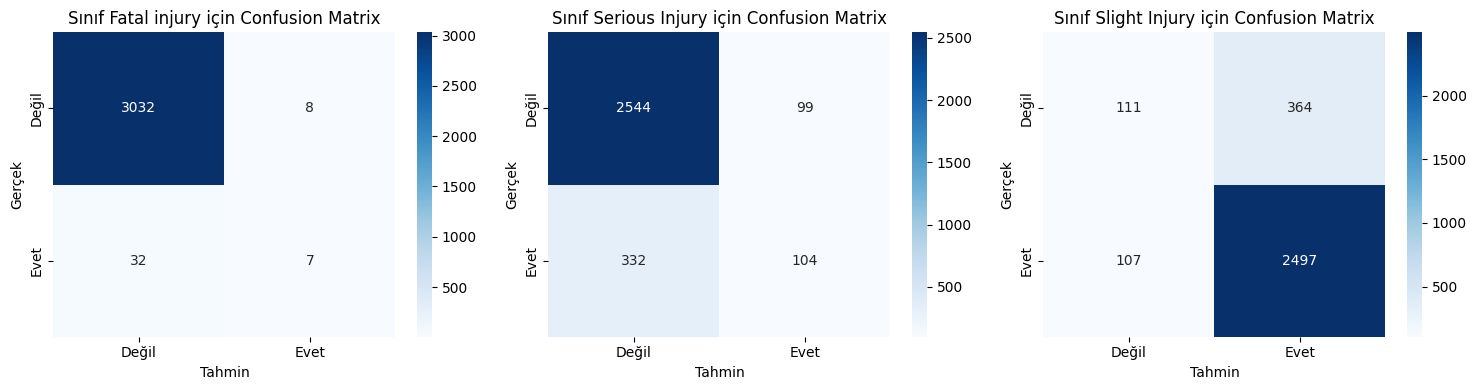

In [40]:
etiketler = np.unique(y_test8)

y_pred = best_modeller['Random Forest'].predict(X_test_8)

fig, axes = plt.subplots(1, len(etiketler), figsize=(5 * len(etiketler), 4))

for i, etiket in enumerate(etiketler):
    y_true_binary = (y_test8 == etiket).astype(int)
    y_pred_binary = (y_pred == etiket).astype(int)

    cm = confusion_matrix(y_true_binary, y_pred_binary)
    
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i])
    axes[i].set_title(f"Sınıf {etiket} için Confusion Matrix")
    axes[i].set_xlabel("Tahmin")
    axes[i].set_ylabel("Gerçek")
    axes[i].set_xticklabels(["Değil", "Evet"])
    axes[i].set_yticklabels(["Değil", "Evet"])

plt.tight_layout()
plt.show()